<a href="https://colab.research.google.com/github/pacogp/TFM/blob/main/Analisis_Exploratorio_TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máster en Big Data y Data Science - Universidad Internacional de Valencia

# TRABAJO FIN DE MASTER - Septiembre '21


## ALUMNO: FRANCISCO GOMEZ PARRA

In [1]:
# Inicialmente importamos las librería y módulos que vamos a necesitar
import pandas as pd
import io 
from google.colab import files

# para manipulación de datos y representaciones visuales vamos a necesitsar importar lo siguiente
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [2]:
# para la importación de los datos: definimos la función upload_files

def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [3]:
# llamamos a la función, seleccionams el archivo y mostramos la cabecera del mismo 2020_2019_4_3_2_1.csv 
# ruta archivo: D:\master_Big_Data_Science\ASIGNATURAS\TFM\POWERBI\

train = upload_files()
train.head()

Saving 2020_2019_4_3_2_1.csv to 2020_2019_4_3_2_1.csv
User uploaded file "2020_2019_4_3_2_1.csv" with length 7670150 bytes


,EMPRESA,EJERCICIO,Trimestre_Ejercicio,FECHA,CLIENTE,TERCERO,TIPO,RIG,LINEA,MODELO,ARTICULO,TITULO_ART,NUM_PLAZAS,MECANISMO_MODULO,UNIDADES,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,TELA,PARTE,SUM_METROS_PARTE_TAPIZABLE,COSTE_MEDIO_TAPIZADO,Coste_Tapizado_Agrup,P_COSTE,Coste_MP,Margen_Uds_linea,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,TITULO_PROVINCIA,COD_COMUNIDAD,TITULO_COMUNIDAD,Hipoteca,suma_incidencias,PIB_VALOR_EUROS,PARO_2020T3
0,1,2019,20191,01/02/2019,386,6833,PEC,1902118,1,CIN,CIN3CB/IT,CINTHIA MOD. 3 PL. DESLZANTE. C/B IZQ. 1.77 Tela,300,DESLIZANTE,1,"592,02",S6,T,MARINA-107,COM,"9,15",9.85,"90,13","154,01","244,14","347,88",8.0,"67,73","1472,46","0,00","117,80","1354,66",8,Barcelona,9.0,Cataluña,0.3240,89.0,"29885,00","11,40"
1,1,2019,20191,01/02/2019,386,6833,PEC,1902118,2,CIN,CIN1MCB/DGT,CINTHIA MOD. 1PL. MOTOR RELAX C/B DER. 1.17 Tela,100,MOTOR,1,"470,58",S6,T,MARINA-107,COM,"9,15",9.85,"90,13","127,43","217,56","253,02",8.0,"67,73","1472,46","0,00","117,80","1354,66",8,Barcelona,9.0,Cataluña,0.3240,89.0,"29885,00","11,40"
2,1,2019,20191,01/02/2019,386,6833,PEC,1902118,3,CIN,CIN1T,CINTHIA SILLON DESLZANTE. 1.14 Tela,100,DESLIZANTE,1,"409,86",S6,T,MARINA-107,COM,"9,15",9.85,"90,13","110,43","200,56","209,30",8.0,"67,73","1472,46","0,00","117,80","1354,66",8,Barcelona,9.0,Cataluña,0.3240,89.0,"29885,00","11,40"
3,1,2019,20191,01/02/2019,4951,486,PEC,1902127,1,VIA,VIA1FCB/DT,VIANA MOD. 1 PL. FIJO C/B DER. 0.89 Tela,100,FIJO,1,"266,34",S6,T,CARABU-49,COM,"4,60",9.39,"43,19","53,02","96,21","170,13",16.0,"0,00","1305,48","21,93","208,86","1074,70",7,"Balears, Illes",4.0,"Balears, Illes",0.4149,53.0,"27134,00","11,18"
4,1,2019,20191,01/02/2019,4951,486,PEC,1902127,2,VIA,VIA1FSBT,VIANA MOD. 1 PL. FIJO S/B 61 Tela,100,FIJO,2,"422,28",S6,T,CARABU-49,COM,"4,60",9.39,"86,39","36,05","158,49","263,79",16.0,"0,00","1305,48","21,93","208,86","1074,70",7,"Balears, Illes",4.0,"Balears, Illes",0.4149,53.0,"27134,00","11,18"


In [4]:
# Vista de los tipos de datos y datos básicos

train.info()

print("-------------------------------------")
print(f"Cantidad de filas: {train.shape[0]}")
print(f"Cantidad de columnas: {train.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25258 entries, 0 to 25257
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EMPRESA                     25258 non-null  int64  
 1   EJERCICIO                   25258 non-null  int64  
 2   Trimestre_Ejercicio         25258 non-null  int64  
 3   FECHA                       25258 non-null  object 
 4   CLIENTE                     25258 non-null  int64  
 5   TERCERO                     25258 non-null  int64  
 6   TIPO                        25258 non-null  object 
 7   RIG                         25258 non-null  int64  
 8   LINEA                       25258 non-null  int64  
 9   MODELO                      25258 non-null  object 
 10  ARTICULO                    25258 non-null  object 
 11  TITULO_ART                  25258 non-null  object 
 12  NUM_PLAZAS                  25258 non-null  int64  
 13  MECANISMO_MODULO            252

##  Transformaciones de tipo de dato


1.   Renombramos las columnas que están en minúsculas a mayúsculas.
2.   Convertimos los campos **object** IMPORTE_LINEA, SUM_METROS_PARTE_TAPIZABLE, COSTE_TAPIZADO_AGRUP, P_COSTE, COSTE_MP, MARGEN_UDS_LINEA, I_COMISION, I_BRUTO, DTO_PP, DTO_LINEAS, MARGEN_BRUTO, PIB_VALOR_EUROS, PARO_2020T3 a tipo de dato **float64**.


In [5]:
train.rename(columns={'Trimestre_Ejercicio': 'TRIMESTRE_EJERCICIO', 
                      'Coste_Tapizado_Agrup': 'COSTE_TAPIZADO_AGRUP',
                      'Coste_MP': 'COSTE_MP',
                      'Margen_Uds_linea': 'MARGEN_UDS_LINEA',
                      'suma_incidencias': 'INDENCIAS_CLIENTE',
                      'Hipoteca': 'HIPOTECA'}, inplace=True)

In [6]:
# Comprobamosque la transformación es correcta
train.dtypes

EMPRESA                         int64
EJERCICIO                       int64
TRIMESTRE_EJERCICIO             int64
FECHA                          object
CLIENTE                         int64
TERCERO                         int64
TIPO                           object
RIG                             int64
LINEA                           int64
MODELO                         object
ARTICULO                       object
TITULO_ART                     object
NUM_PLAZAS                      int64
MECANISMO_MODULO               object
UNIDADES                        int64
IMPORTE_LINEA                  object
CATEGORIA                      object
TIPO_TAPICERIA                 object
TELA                           object
PARTE                          object
SUM_METROS_PARTE_TAPIZABLE     object
COSTE_MEDIO_TAPIZADO          float64
COSTE_TAPIZADO_AGRUP           object
P_COSTE                        object
COSTE_MP                       object
MARGEN_UDS_LINEA               object
DTO_FAMILIA 

In [7]:
# Transformamos los atributos string a float

train['IMPORTE_LINEA'] = train['IMPORTE_LINEA'].str.replace(',','.').astype('float')
train['SUM_METROS_PARTE_TAPIZABLE'] = train['SUM_METROS_PARTE_TAPIZABLE'].str.replace(',','.').astype('float')
train['COSTE_TAPIZADO_AGRUP'] = train['COSTE_TAPIZADO_AGRUP'].str.replace(',','.').astype('float')
train['P_COSTE'] = train['P_COSTE'].str.replace(',','.').astype('float')
train['COSTE_MP'] = train['COSTE_MP'].str.replace(',','.').astype('float')
train['MARGEN_UDS_LINEA'] = train['MARGEN_UDS_LINEA'].str.replace(',','.').astype('float')
train['I_COMISION'] = train['I_COMISION'].str.replace(',','.').astype('float')
train['I_BRUTO'] = train['I_BRUTO'].str.replace(',','.').astype('float') 
train['DTO_PP'] = train['DTO_PP'].str.replace(',','.').astype('float') 
train['DTO_LINEAS'] = train['DTO_LINEAS'].str.replace(',','.').astype('float')
train['MARGEN_BRUTO'] = train['MARGEN_BRUTO'].str.replace(',','.').astype('float')
train['PIB_VALOR_EUROS'] = train['PIB_VALOR_EUROS'].str.replace(',','.').astype('float')
train['PARO_2020T3'] = train['PARO_2020T3'].str.replace(',','.').astype('float')


In [8]:
# Comprobamos que las modificaciones se han realizado correctamente
train.dtypes

EMPRESA                         int64
EJERCICIO                       int64
TRIMESTRE_EJERCICIO             int64
FECHA                          object
CLIENTE                         int64
TERCERO                         int64
TIPO                           object
RIG                             int64
LINEA                           int64
MODELO                         object
ARTICULO                       object
TITULO_ART                     object
NUM_PLAZAS                      int64
MECANISMO_MODULO               object
UNIDADES                        int64
IMPORTE_LINEA                 float64
CATEGORIA                      object
TIPO_TAPICERIA                 object
TELA                           object
PARTE                          object
SUM_METROS_PARTE_TAPIZABLE    float64
COSTE_MEDIO_TAPIZADO          float64
COSTE_TAPIZADO_AGRUP          float64
P_COSTE                       float64
COSTE_MP                      float64
MARGEN_UDS_LINEA              float64
DTO_FAMILIA 

In [9]:
# Comprobamos de todas las variables, que subconjunto son númericas. 

train_numeric = train.select_dtypes(include=[np.number])
numeric_cols = train_numeric.columns.values
print(numeric_cols)

['EMPRESA' 'EJERCICIO' 'TRIMESTRE_EJERCICIO' 'CLIENTE' 'TERCERO' 'RIG'
 'LINEA' 'NUM_PLAZAS' 'UNIDADES' 'IMPORTE_LINEA'
 'SUM_METROS_PARTE_TAPIZABLE' 'COSTE_MEDIO_TAPIZADO'
 'COSTE_TAPIZADO_AGRUP' 'P_COSTE' 'COSTE_MP' 'MARGEN_UDS_LINEA'
 'DTO_FAMILIA' 'I_COMISION' 'I_BRUTO' 'DTO_PP' 'DTO_LINEAS' 'MARGEN_BRUTO'
 'PROVINCIA' 'COD_COMUNIDAD' 'HIPOTECA' 'INDENCIAS_CLIENTE'
 'PIB_VALOR_EUROS' 'PARO_2020T3']


In [10]:
# Hacemos lo mismo con las variables que no son númericas

train_non_numeric = train.select_dtypes(exclude=[np.number])
non_numeric_cols = train_non_numeric.columns.values
print(non_numeric_cols)

['FECHA' 'TIPO' 'MODELO' 'ARTICULO' 'TITULO_ART' 'MECANISMO_MODULO'
 'CATEGORIA' 'TIPO_TAPICERIA' 'TELA' 'PARTE' 'TITULO_PROVINCIA'
 'TITULO_COMUNIDAD']


# Missing values

Cubrimos 2 técnicas para aprender más sobre los datos que faltan en nuestro conjunto de datos.

El gráfico que figura muestra los patrones de datos que faltan de las primeras 40 características. El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario. Por ejemplo, vemos que la característica INCIDENCIAS_CLIENTE tiene valores perdidos.

## Técnica 1: Missing Data Heatmap - mapa de calor



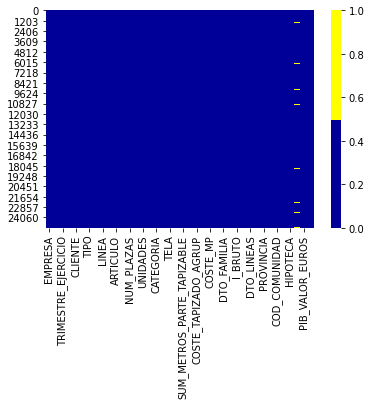

In [11]:
cols = train.columns[:40] # first 40 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours), xticklabels= 'auto')

## Técnica 2: Missing Data Percentage List

Lo podemos ver mejor si realizamos un listado porcentual de los atributos con valores nulos. Tan solo el atributo "INDENCIAS_CLIENTE" es el que tiene valores nulos, un 2% de los datos.

In [12]:
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

EMPRESA - 0%
EJERCICIO - 0%
TRIMESTRE_EJERCICIO - 0%
FECHA - 0%
CLIENTE - 0%
TERCERO - 0%
TIPO - 0%
RIG - 0%
LINEA - 0%
MODELO - 0%
ARTICULO - 0%
TITULO_ART - 0%
NUM_PLAZAS - 0%
MECANISMO_MODULO - 0%
UNIDADES - 0%
IMPORTE_LINEA - 0%
CATEGORIA - 0%
TIPO_TAPICERIA - 0%
TELA - 0%
PARTE - 0%
SUM_METROS_PARTE_TAPIZABLE - 0%
COSTE_MEDIO_TAPIZADO - 0%
COSTE_TAPIZADO_AGRUP - 0%
P_COSTE - 0%
COSTE_MP - 0%
MARGEN_UDS_LINEA - 0%
DTO_FAMILIA - 0%
I_COMISION - 0%
I_BRUTO - 0%
DTO_PP - 0%
DTO_LINEAS - 0%
MARGEN_BRUTO - 0%
PROVINCIA - 0%
TITULO_PROVINCIA - 0%
COD_COMUNIDAD - 0%
TITULO_COMUNIDAD - 0%
HIPOTECA - 0%
INDENCIAS_CLIENTE - 2%
PIB_VALOR_EUROS - 0%
PARO_2020T3 - 0%


In [13]:
# Si queremos obtener la cantidad de nulos específico por cada columna

nulos_x_columna = train.isna().sum()

print(f"Cantidad de filas que tienen valores nulos por atributo:\n{nulos_x_columna}")

Cantidad de filas que tienen valores nulos por atributo:
EMPRESA                         0
EJERCICIO                       0
TRIMESTRE_EJERCICIO             0
FECHA                           0
CLIENTE                         0
TERCERO                         0
TIPO                            0
RIG                             0
LINEA                           0
MODELO                          0
ARTICULO                        0
TITULO_ART                      0
NUM_PLAZAS                      0
MECANISMO_MODULO                0
UNIDADES                        0
IMPORTE_LINEA                   0
CATEGORIA                       0
TIPO_TAPICERIA                  0
TELA                            0
PARTE                           0
SUM_METROS_PARTE_TAPIZABLE      0
COSTE_MEDIO_TAPIZADO            0
COSTE_TAPIZADO_AGRUP            0
P_COSTE                         0
COSTE_MP                        0
MARGEN_UDS_LINEA                0
DTO_FAMILIA                     0
I_COMISION               

Vemos que los atributos TITULO_PROVINCIA, COD_COMUNIDAD, TITULO_COMUNIDAD, HIPOTECA, PIB_VALOR_EUROS, PARO_2020T3, son los únicos que contienen valores nulos. Nos damos cuenta que son los mismos registros nulos para todos los atributos. Puesto consideramos que son datos irrelevante, son subceptibles de ser eliminados.

In [ ]:
# Mostramos los registros que contienen valores NaN, por ejemplo para TITULO_PROVINCIA 
train[train['TITULO_PROVINCIA'].isnull()]

,EMPRESA,EJERCICIO,TRIMESTRE_EJERCICIO,FECHA,CLIENTE,TERCERO,TIPO,RIG,LINEA,MODELO,ARTICULO,TITULO_ART,NUM_PLAZAS,MECANISMO_MODULO,UNIDADES,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,TELA,PARTE,SUM_METROS_PARTE_TAPIZABLE,COSTE_MEDIO_TAPIZADO,COSTE_TAPIZADO_AGRUP,P_COSTE,COSTE_MP,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,TITULO_PROVINCIA,COD_COMUNIDAD,TITULO_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3
21396,1,2020,20203,21/07/2020,8230,3284,PEC,2009317,1,MRN,MAR1MCB/IGT,MARINA MOD. 1 PL. MOTOR C/B IZQ. 1.17(BR.25) Tela,100,MOTOR,1,527.28,S4,T,MOZART-OLIVEGRE,COM,5.5,4.00,22.00,165.83,187.83,339.45,5.0,101.20,2196.48,0.0,172.42,2024.06,52,NaN,NaN,NaN,NaN,4.0,NaN,NaN
21397,1,2020,20203,21/07/2020,8230,3284,PEC,2009317,2,MRN,MAR1MCB/DGT,MARINA MOD. 1 PL. MOTOR C/B DER. 1.17(BR.25) Tela,100,MOTOR,1,527.28,S4,T,MOZART-OLIVEGRE,COM,5.5,4.00,22.00,165.83,187.83,339.45,5.0,101.20,2196.48,0.0,172.42,2024.06,52,NaN,NaN,NaN,NaN,4.0,NaN,NaN
21398,1,2020,20203,21/07/2020,8230,3284,PEC,2009317,3,MRN,MAR1MCB/IMT,MARINA MOD. 1 PL. MOTOR C/B IZQ. 1.02(BRAZO 25...,100,MOTOR,1,570.96,S4,T,MOZART-OLIVEGRE,COM,5.5,4.00,22.00,157.50,179.50,391.46,5.0,101.20,2196.48,0.0,172.42,2024.06,52,NaN,NaN,NaN,NaN,4.0,NaN,NaN
21399,1,2020,20203,21/07/2020,8230,3284,PEC,2009317,4,MRN,MAR1MCB/DMT,MARINA MOD. 1 PL. MOTOR C/B DER. 1.02 (BRAZO 2...,100,MOTOR,1,570.96,S4,T,MOZART-OLIVEGRE,COM,5.5,4.00,22.00,157.50,179.50,391.46,5.0,101.20,2196.48,0.0,172.42,2024.06,52,NaN,NaN,NaN,NaN,4.0,NaN,NaN
21917,1,2020,20203,22/09/2020,9668,11120,PEC,2013065,1,MRN,MAR2DT,MARINA SOFA 2PL. DESLIZANTE 1.72 (BR.25 ) Tela,200,DESLIZANTE,2,1376.94,S4,T,MOZART-ASH,COM,4.5,3.93,35.37,206.05,447.47,929.47,5.0,63.44,1376.94,0.0,108.09,1268.85,51,NaN,NaN,NaN,NaN,1.0,NaN,NaN
23138,1,2020,20202,25/06/2020,9668,11120,PEC,2007398,1,MRN,MAR2DT,MARINA SOFA 2PL. DESLIZANTE 1.72 (BR.25 ) Tela,200,DESLIZANTE,1,675.48,S4,T,MOZART-ASH,COM,4.5,3.93,17.69,206.05,223.74,451.75,5.0,75.93,1698.84,0.0,180.32,1518.52,51,NaN,NaN,NaN,NaN,1.0,NaN,NaN
23139,1,2020,20202,25/06/2020,9668,11120,PEC,2007398,2,MRN,MAR1MCB/IMT,MARINA MOD. 1 PL. MOTOR C/B IZQ. 1.02(BRAZO 25...,100,MOTOR,1,511.68,S4,T,MOZART-ASH,COM,4.5,3.93,17.69,157.50,175.19,336.50,5.0,75.93,1698.84,0.0,180.32,1518.52,51,NaN,NaN,NaN,NaN,1.0,NaN,NaN
23140,1,2020,20202,25/06/2020,9668,11120,PEC,2007398,3,MRN,MAR1MCB/DMT,MARINA MOD. 1 PL. MOTOR C/B DER. 1.02 (BRAZO 2...,100,MOTOR,1,511.68,S4,T,MOZART-ASH,COM,4.5,3.93,17.69,157.50,175.19,336.50,5.0,75.93,1698.84,0.0,180.32,1518.52,51,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [14]:
# Eliminamos los 8 registros con valores nulos de los atributos TITULO_PROVINCIA, COD_COMUNIDAD, TITULO_COMUNIDAD, HIPOTECA, PIB_VALOR_EUROS, PARO_2020T3 

ind_missing = train[train['TITULO_PROVINCIA'].isnull()].index # Creamos una lista con los indices cuyos registros son nulos (Es suficiente con el atributo TITULO_PROVINCIA)
df_less_missing_rows = train.drop(ind_missing, axis=0) # Creamos un nuevo dataset sin los registros eliminados anteriormente.


In [15]:
# Comprobamos que efectivamente fueron eliminados

nulos_x_columna = df_less_missing_rows.isna().sum()

print(f"Cantidad de filas que tienen valores nulos por atributo:\n{nulos_x_columna}")

Cantidad de filas que tienen valores nulos por atributo:
EMPRESA                         0
EJERCICIO                       0
TRIMESTRE_EJERCICIO             0
FECHA                           0
CLIENTE                         0
TERCERO                         0
TIPO                            0
RIG                             0
LINEA                           0
MODELO                          0
ARTICULO                        0
TITULO_ART                      0
NUM_PLAZAS                      0
MECANISMO_MODULO                0
UNIDADES                        0
IMPORTE_LINEA                   0
CATEGORIA                       0
TIPO_TAPICERIA                  0
TELA                            0
PARTE                           0
SUM_METROS_PARTE_TAPIZABLE      0
COSTE_MEDIO_TAPIZADO            0
COSTE_TAPIZADO_AGRUP            0
P_COSTE                         0
COSTE_MP                        0
MARGEN_UDS_LINEA                0
DTO_FAMILIA                     0
I_COMISION               

Ahora tenemos un nuevo dataset con 25250 registros y 40 variables.

Vemos qué hacemos con los 574 Nulos para el atributo INCIDENCIAS_CLIENTE

In [16]:
# Mostramos aquellos registros NaN para INCIDENCIAS_CLIENTE

df_less_missing_rows[df_less_missing_rows['INDENCIAS_CLIENTE'].isnull()]

,EMPRESA,EJERCICIO,TRIMESTRE_EJERCICIO,FECHA,CLIENTE,TERCERO,TIPO,RIG,LINEA,MODELO,ARTICULO,TITULO_ART,NUM_PLAZAS,MECANISMO_MODULO,UNIDADES,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,TELA,PARTE,SUM_METROS_PARTE_TAPIZABLE,COSTE_MEDIO_TAPIZADO,COSTE_TAPIZADO_AGRUP,P_COSTE,COSTE_MP,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,TITULO_PROVINCIA,COD_COMUNIDAD,TITULO_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3
70,1,2019,20191,01/03/2019,6568,1796,PEC,1904508,1,ARL,ARL3CB/DGT,ARIEL MOD. 3PL. DER. 1.82 BRAZO 30 Tela,300,DESLIZANTE,1,536.82,S6,T,DIAMOND-14,COM,8.30,11.40,94.62,146.60,241.22,295.60,8.0,43.05,954.96,17.57,76.40,860.99,12,Castellón/Castelló,10.0,Comunitat Valenciana,0.2444,NaN,26351.0,15.67
71,1,2019,20191,01/03/2019,6568,1796,PEC,1904508,2,ARL,ARLCHCB/IGT,ARIEL MOD. CHAISELONG CANAPE C/BR. IZQ. 1.04 Tela,200,CH,1,418.14,S6,T,DIAMOND-14,COM,8.30,11.40,94.62,114.81,209.43,208.71,8.0,43.05,954.96,17.57,76.40,860.99,12,Castellón/Castelló,10.0,Comunitat Valenciana,0.2444,NaN,26351.0,15.67
171,1,2019,20193,01/07/2019,522,7495,PEC,1911163,1,COJ,COJOJINT,COJIN .NETO. Tela (NETO),0,COJIN,1,30.36,S4,T,NEVADA-TOFFEE,COM,0.60,5.98,3.59,2.53,6.12,24.24,9.0,0.00,60.72,0.00,0.00,60.72,11,Cádiz,1.0,Andalucía,0.2673,NaN,17231.0,21.75
172,1,2019,20193,01/07/2019,522,7495,PEC,1911163,2,COJ,COJOJINT,COJIN .NETO. Tela (NETO),0,COJIN,1,30.36,S4,T,NEVADA-TOFFEE,COM,0.60,5.98,3.59,2.53,6.12,24.24,9.0,0.00,60.72,0.00,0.00,60.72,11,Cádiz,1.0,Andalucía,0.2673,NaN,17231.0,21.75
230,1,2019,20193,01/08/2019,8620,3556,PEC,1912475,1,DOO,DOORINCONC/IT,DOROTY RINCON TERMINAL CANAPE IZQ CON CABEZAL ...,75,RINCON,1,496.80,S4,T,LIDO-1,COM,8.00,3.55,28.40,205.44,233.84,262.96,5.0,71.90,1437.96,0.00,0.00,1437.96,13,Ciudad Real,8.0,Castilla-La Mancha,0.2351,NaN,20771.0,16.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24981,1,2020,20203,30/09/2020,9725,11202,PEC,2013797,3,ASH,ASH2DT,ASHLEY SOFA 2 PL. DESLIZANTE 164 Tela,200,DESLIZANTE,1,648.72,S4,T,CAVALLI-12,COM,5.45,4.77,26.00,233.65,259.65,389.07,5.0,77.68,1685.40,0.00,132.30,1553.10,42,Soria,7.0,Castilla y León,0.2449,NaN,24445.0,10.98
25254,1,2020,20204,31/10/2020,9758,11245,PEC,2016309,1,ASH,ASH1MCB/IMT,ASHLEY MOD. 1 PL. RELAX MOTOR CB IZQ. 98 Tela,100,MOTOR,1,494.49,S5,T,ORINOCO-2,COM,4.95,12.00,59.40,151.65,211.05,283.44,5.0,138.79,2151.27,0.00,168.87,1982.40,45,Toledo,8.0,Castilla-La Mancha,0.2351,NaN,18022.0,16.70
25255,1,2020,20204,31/10/2020,9758,11245,PEC,2016309,2,ASH,ASH1DSBMT,ASHLEY MOD. 1 PL. DESLIZANTE S/B 77 Tela,100,DESLIZANTE,1,327.54,S5,T,ORINOCO-2,COM,4.95,12.00,59.40,104.10,163.50,164.04,5.0,138.79,2151.27,0.00,168.87,1982.40,45,Toledo,8.0,Castilla-La Mancha,0.2351,NaN,18022.0,16.70
25256,1,2020,20204,31/10/2020,9758,11245,PEC,2016309,3,ASH,ASHCHCB/DMT,ASHLEY CHAISELONG FIJO MEDIANO C/B DER. 98 Tela,200,CH,1,505.62,S5,T,ORINOCO-2,COM,4.95,12.00,59.40,158.69,218.09,287.53,5.0,138.79,2151.27,0.00,168.87,1982.40,45,Toledo,8.0,Castilla-La Mancha,0.2351,NaN,18022.0,16.70


Reportamos el informe a la empresa y consultamos con el experto, a fin de ver el procesamiento que podemos dar a estos datos.

Me indican que los clientes afectados no registraron incidencia alguna. Por lo que podríamos rellenar los valores nulos por 0.

In [17]:
# reemplazamos los valores perdidos de INDENCIAS_CLIENTE por 0. Ya que el experto indica no han tenido ninguna reclamación registrada para esos clientes.

df_fill= df_less_missing_rows.fillna(axis=1, method='ffill').fillna(0)

In [18]:
# Comprobamos que efectivamente fueros eliminados

nulos_x_columna = df_fill.isna().sum()

print(f"Cantidad de filas que tienen valores nulos por atributo:\n{nulos_x_columna}")

Cantidad de filas que tienen valores nulos por atributo:
EMPRESA                       0
EJERCICIO                     0
TRIMESTRE_EJERCICIO           0
FECHA                         0
CLIENTE                       0
TERCERO                       0
TIPO                          0
RIG                           0
LINEA                         0
MODELO                        0
ARTICULO                      0
TITULO_ART                    0
NUM_PLAZAS                    0
MECANISMO_MODULO              0
UNIDADES                      0
IMPORTE_LINEA                 0
CATEGORIA                     0
TIPO_TAPICERIA                0
TELA                          0
PARTE                         0
SUM_METROS_PARTE_TAPIZABLE    0
COSTE_MEDIO_TAPIZADO          0
COSTE_TAPIZADO_AGRUP          0
P_COSTE                       0
COSTE_MP                      0
MARGEN_UDS_LINEA              0
DTO_FAMILIA                   0
I_COMISION                    0
I_BRUTO                       0
DTO_PP         

In [19]:
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25250 entries, 0 to 25257
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EMPRESA                     25250 non-null  int64  
 1   EJERCICIO                   25250 non-null  int64  
 2   TRIMESTRE_EJERCICIO         25250 non-null  int64  
 3   FECHA                       25250 non-null  object 
 4   CLIENTE                     25250 non-null  int64  
 5   TERCERO                     25250 non-null  int64  
 6   TIPO                        25250 non-null  object 
 7   RIG                         25250 non-null  int64  
 8   LINEA                       25250 non-null  int64  
 9   MODELO                      25250 non-null  object 
 10  ARTICULO                    25250 non-null  object 
 11  TITULO_ART                  25250 non-null  object 
 12  NUM_PLAZAS                  25250 non-null  int64  
 13  MECANISMO_MODULO            252

Hasta aquí, disponemos de un dataset **"df_fill" de 25250 registros y 40 atributos**.

A continuación:

  1.  Descartamos aquellos atributos que por contener valores repetitivos o irrelevantes, innecesarios para nuestro estudio o no añaden valor.
      
                - especificamos a continuación para mostrar las características con más del 95% de filas que tienen el mismo valor.
                  Vemos que los atributos EMPRESA,TIPO, UNIDADES están en este rango. Son datos desinformativos o repetitivos.
                - Además los atributos que consideramos irrelevantes son:
                      "EJERCICIO": 2019, 2020 
                      "TRIMESTRE_EJERCICIO": Concatenación del trimestre en que se realiza el pedido de cliente y el ejercicio.
                      "FECHA": Día del pedido de cliente.
                      "TERCERO": Contador único de cliente que el ERP asigna automáticamente, similar al código de CLIENTE. 
                      "RIG": Alfanumérico, código del pedido de cliente.
                      "LINEA": Línea del pedido de cliente.
                      "ARTICULO": Código atribuido al artículo "sofá".
                      "TITULO_ART": Descripción del artículo/sofá pedido
                      "COSTE_MP": Coste de la materia prima del artículo demandado
                      "COSTE_MEDIO_TAPIZADO": Coste medio, del valor de compra de la tela o la pien con la que se es tapizado el sofá.
                      "SUM_METROS_PARTE_TAPIZABLE": metros necesarios para tapizar completamente el sofá.
                      "TITULO_PROVINCIA": Descripción de la provincia a la que pertenece el cliente.
                      "TITULO_COMUNIDAD": Descripción de la comunidad a la que pertenece el cliente.
                      "TELA": Código de la tela, con la que se tapiza el sofá.
                      "PARTE": Localización o Parte del sofá que puede ser tapizada.
                - 

  2.   Añadimos un nuevos atributo calculado "status_cliente"
  3.   Buscamos Atributos cuyos registros tengan duplicados en un % mayor al 95%. Éstos serían candidatos para su borrado posterior.



In [20]:
num_rows = len(df_fill.index)
low_information_cols = [] 

for col in df_fill.columns:
    cnts = df_fill[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

EMPRESA: 100.00000%
1    25250
Name: EMPRESA, dtype: int64

TIPO: 100.00000%
PEC    25250
Name: TIPO, dtype: int64

UNIDADES: 96.17030%
1    24283
2      843
3       63
4       52
6        4
5        3
8        1
7        1
Name: UNIDADES, dtype: int64



In [21]:
df_fill.drop(["EMPRESA","TIPO","UNIDADES","EJERCICIO","TRIMESTRE_EJERCICIO","FECHA","TERCERO","RIG","LINEA","ARTICULO", "TITULO_ART","COSTE_MP",
              "COSTE_MEDIO_TAPIZADO","SUM_METROS_PARTE_TAPIZABLE","TITULO_PROVINCIA","TITULO_COMUNIDAD","TELA","PARTE"], axis = 1, inplace = True)


### Análisis de duplicados en base a características

In [22]:
# Si queremos saber en base a una característica, los duplicados, podemos hacer:

df_dedupped = df_fill.drop('CLIENTE', axis=1).drop_duplicates()

# there were duplicate rows
print(df_fill.shape)
print(df_dedupped.shape)

(25250, 22)
(21320, 21)


### Análisis de duplicados en base a un conjunto de características

Podemos eliminar estos duplicados basándonos en las características principales. ( Si lo consideramos necesario)

In [23]:
key = ['CATEGORIA', 'COSTE_TAPIZADO_AGRUP', 'DTO_PP', 'PARO_2020T3', 'P_COSTE', 'HIPOTECA', 'TIPO_TAPICERIA']

df_fill.fillna(-999).groupby(key)['CLIENTE'].count().sort_values(ascending=False).head(20)

CATEGORIA  COSTE_TAPIZADO_AGRUP  DTO_PP  PARO_2020T3  P_COSTE  HIPOTECA  TIPO_TAPICERIA
S6         44.79                 0.00    11.89        97.86    0.3404    T                 18
           44.59                 0.00    11.89        97.86    0.3404    T                 17
           52.10                 0.00    11.89        112.94   0.3404    T                 14
S4         18.35                 0.00    8.47         157.50   0.2610    T                 14
S6         42.04                 0.00    11.89        95.36    0.3404    T                 14
           52.10                 0.00    11.89        97.86    0.3404    T                 12
                                                      52.69    0.3404    T                 11
S4         26.00                 0.00    15.06        94.00    0.2194    T                 11
GA         189.00                20.99   8.47         98.72    0.2610    P                 10
S4         17.87                 0.00    11.40        122.93   0.3

In [24]:
key = ['CATEGORIA', 'COSTE_TAPIZADO_AGRUP', 'DTO_PP', 'PARO_2020T3', 'P_COSTE', 'HIPOTECA', 'TIPO_TAPICERIA']
df_dedupped2 = df_fill.drop_duplicates(subset=key)

print(df_fill.shape)
print(df_dedupped2.shape)

(25250, 22)
(20729, 22)


In [25]:
df_dedupped2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20729 entries, 0 to 25257
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLIENTE               20729 non-null  int64  
 1   MODELO                20729 non-null  object 
 2   NUM_PLAZAS            20729 non-null  int64  
 3   MECANISMO_MODULO      20729 non-null  object 
 4   IMPORTE_LINEA         20729 non-null  float64
 5   CATEGORIA             20729 non-null  object 
 6   TIPO_TAPICERIA        20729 non-null  object 
 7   COSTE_TAPIZADO_AGRUP  20729 non-null  float64
 8   P_COSTE               20729 non-null  float64
 9   MARGEN_UDS_LINEA      20729 non-null  float64
 10  DTO_FAMILIA           20729 non-null  float64
 11  I_COMISION            20729 non-null  float64
 12  I_BRUTO               20729 non-null  float64
 13  DTO_PP                20729 non-null  float64
 14  DTO_LINEAS            20729 non-null  float64
 15  MARGEN_BRUTO       

A continuación creamos un atributo nuevo "status_cliente", dependiente de los atributos "PIB_VALOR_EUROS", "HIPOTECA y "PARO_2020T3", de modo que cuanto mayor es su valor, mayor es el status del cliente que compra un determinado sofá u otro.

In [26]:
from math import sqrt

def calcularStatus(row):
    if row['INDENCIAS_CLIENTE']== 0:
        status_cliente = sqrt((row['PIB_VALOR_EUROS']/(row['HIPOTECA']*row['PARO_2020T3'])))
    else :
        status_cliente = sqrt((row['PIB_VALOR_EUROS']/(row['HIPOTECA']*row['PARO_2020T3']*row['INDENCIAS_CLIENTE'])))
    return status_cliente

status_cliente = df_dedupped2.apply(lambda row: calcularStatus(row), axis=1).rename('status_cliente')
status_cliente

0          9.534693
1          9.534693
2          9.534693
3         10.505733
4         10.505733
            ...    
25253     33.274214
25254    139.730312
25255    139.730312
25256    139.730312
25257    139.730312
Name: status_cliente, Length: 20729, dtype: float64

In [27]:
df_dedupped2 = pd.concat([df_dedupped2, status_cliente], axis=1)
df_dedupped2.head()

,CLIENTE,MODELO,NUM_PLAZAS,MECANISMO_MODULO,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente
0,386,CIN,300,DESLIZANTE,592.02,S6,T,90.13,154.01,347.88,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
1,386,CIN,100,MOTOR,470.58,S6,T,90.13,127.43,253.02,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
2,386,CIN,100,DESLIZANTE,409.86,S6,T,90.13,110.43,209.30,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
3,4951,VIA,100,FIJO,266.34,S6,T,43.19,53.02,170.13,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733
4,4951,VIA,100,FIJO,422.28,S6,T,86.39,36.05,263.79,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733


In [28]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
df_dedupped2['tipo_tap_bin'] = lb.fit_transform(df_dedupped2['TIPO_TAPICERIA'])



In [29]:
df_dedupped2.head()

,CLIENTE,MODELO,NUM_PLAZAS,MECANISMO_MODULO,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente,tipo_tap_bin
0,386,CIN,300,DESLIZANTE,592.02,S6,T,90.13,154.01,347.88,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
1,386,CIN,100,MOTOR,470.58,S6,T,90.13,127.43,253.02,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
2,386,CIN,100,DESLIZANTE,409.86,S6,T,90.13,110.43,209.30,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
3,4951,VIA,100,FIJO,266.34,S6,T,43.19,53.02,170.13,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1
4,4951,VIA,100,FIJO,422.28,S6,T,86.39,36.05,263.79,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1


 **Para conocer los valores únicos por atributo y su distribución se usan los métodos .unique() y .value_counts()**

.unique(): lista las ocurrencias de valores únicos en el atributo

.value_counts(): por cada valor del atributo muestra la cantidad de filas que registran tal valor


In [30]:
#Vista de los valores únicos en los atributos de tipo string

print(f"Valores presentes en el atributo:\n{df_dedupped2['MODELO'].unique()}")

#Vista de la cantidad de ocurrencias de cada valor

print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['MODELO'].value_counts()}")

Valores presentes en el atributo:
['CIN' 'VIA' 'AMB' 'CAT' 'ZAI' 'MRE' 'PDY' 'CIT' 'PAM' 'ALM' 'ELV' 'PAR'
 'ARL' 'REB' 'MAY' 'MRN' 'COJ' 'AIN' 'ANA' 'FRK' 'ANG' 'JIM' 'CEC' 'DOO'
 'SIL' 'PON' 'REN' 'BAR' 'MIN' 'DAM' 'CLA' 'SBE' 'BEL' 'DIF' 'LAR' 'AZA'
 'DIN' 'FIO' 'TER' 'VEZ' 'ADA' 'SNE' 'LUT' 'PIX' 'ASH' 'SBR' 'PRI' 'TOU'
 'STH' 'YAI' 'DUB' 'MIC' 'WEN' 'FEL' 'JUF' 'JUL' 'MAD' 'LSB' 'LRE' 'THO'
 'AUR' 'SYR' 'CAN' 'TUK' 'ING' 'PAL' 'MEM' 'COC' 'SAB' 'KIK' 'JAK' 'BRU'
 'GLO' 'ALB' 'NAV' 'VAL' 'NNA' 'IMP' 'SRI' 'ISA' 'KEN' 'CHL' 'SOF' 'GIN'
 'TEI' 'CEL' 'NOM' 'OSL' 'ETT' 'MON' 'SET' 'LUI' 'EVO' 'BTA' 'CLD' 'LIS'
 'LCA' 'ARY' 'CAR' 'CAS' 'SIN' 'DEL' 'DON' 'KUI' 'MLN' 'DLL' 'POU' 'BST'
 'DER' 'GAM' 'LUZ' 'GUD' 'JAD' 'MEG' 'ETN' 'LIF' 'DIA' 'JOK']
Conteo de ocurrencias por valor:
MRE    1755
CIN    1511
ELV    1248
ANG    1241
ARL    1073
       ... 
NOM       1
JOK       1
ARY       1
DON       1
SOF       1
Name: MODELO, Length: 118, dtype: int64


In [32]:
#Vista de los valores únicos en los atributos de tipo string

print(f"Valores presentes en el atributo:\n{df_dedupped2['MECANISMO_MODULO'].unique()}")

#Vista de la cantidad de ocurrencias de cada valor

print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['MECANISMO_MODULO'].value_counts()}")

Valores presentes en el atributo:
['DESLIZANTE' 'MOTOR' 'FIJO' 'RINCON' 'CH' 'CAMA' 'COJIN' 'POUFF']
Conteo de ocurrencias por valor:
MOTOR         6538
DESLIZANTE    6454
CH            3299
FIJO          2564
RINCON        1000
COJIN          541
POUFF          189
CAMA           144
Name: MECANISMO_MODULO, dtype: int64


In [33]:
#Vista de los valores únicos en los atributos de tipo string

print(f"Valores presentes en el atributo:\n{df_dedupped2['CATEGORIA'].unique()}")

#Vista de la cantidad de ocurrencias de cada valor

print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['CATEGORIA'].value_counts()}")

Valores presentes en el atributo:
['S6' 'S5' 'S4' 'S7' 'FL' 'GA' 'TU' 'S8' 'SF']
Conteo de ocurrencias por valor:
S4    9159
S6    8341
FL    1288
S5    1161
TU     251
GA     191
S7     184
S8     131
SF      23
Name: CATEGORIA, dtype: int64


In [34]:
#Vista de los valores únicos en los atributos de tipo string

print(f"Valores presentes en el atributo:\n{df_dedupped2['TIPO_TAPICERIA'].unique()}")

#Vista de la cantidad de ocurrencias de cada valor

print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['TIPO_TAPICERIA'].value_counts()}")

Valores presentes en el atributo:
['T' 'P']
Conteo de ocurrencias por valor:
T    18976
P     1753
Name: TIPO_TAPICERIA, dtype: int64


In [35]:
df_dedupped2.describe()

,CLIENTE,NUM_PLAZAS,IMPORTE_LINEA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente,tipo_tap_bin
count,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000,20729.000000
mean,5728.459935,164.286748,437.746518,62.185938,132.436015,239.982185,7.142313,63.466751,1694.950847,19.766956,189.179179,1486.004764,23.795311,8.451059,0.270299,61.053592,24706.641083,14.325071,22.748056,0.915432
std,2896.033208,88.446384,162.999157,88.188477,49.156904,140.192429,3.395431,81.418228,2541.016544,45.444297,722.706122,1910.311868,14.635664,5.159267,0.043323,82.789924,5531.943404,4.589679,28.083911,0.278244
min,14.000000,0.000000,0.000000,1.800000,1.190000,-3030.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.215600,0.215600,17231.000000,8.470000,2.964063,0.000000
25%,3654.000000,100.000000,356.040000,29.580000,100.240000,190.390000,5.000000,33.640000,905.800000,0.000000,46.620000,829.020000,9.000000,4.000000,0.244400,12.000000,20221.000000,10.980000,9.734669,1.000000
50%,6307.000000,100.000000,429.180000,48.230000,131.840000,244.040000,7.000000,50.320000,1180.200000,14.520000,77.880000,1080.800000,26.000000,9.000000,0.261000,32.000000,22882.000000,11.890000,13.611311,1.000000
75%,8161.000000,200.000000,509.600000,67.710000,163.790000,295.230000,8.000000,71.690000,1534.400000,23.850000,117.800000,1401.640000,33.000000,13.000000,0.267300,86.000000,29885.000000,16.700000,24.810734,1.000000
max,9769.000000,350.000000,2020.320000,3025.850000,334.880000,1570.220000,25.000000,1394.440000,34722.720000,577.270000,8815.040000,28002.280000,50.000000,17.000000,0.414900,385.000000,36921.000000,22.720000,252.961551,1.000000


In [36]:
df_dedupped2.head()

,CLIENTE,MODELO,NUM_PLAZAS,MECANISMO_MODULO,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente,tipo_tap_bin
0,386,CIN,300,DESLIZANTE,592.02,S6,T,90.13,154.01,347.88,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
1,386,CIN,100,MOTOR,470.58,S6,T,90.13,127.43,253.02,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
2,386,CIN,100,DESLIZANTE,409.86,S6,T,90.13,110.43,209.30,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
3,4951,VIA,100,FIJO,266.34,S6,T,43.19,53.02,170.13,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1
4,4951,VIA,100,FIJO,422.28,S6,T,86.39,36.05,263.79,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1


In [37]:
# Comprobamos de todas las variables, que subconjunto no son númericas. 

df_fill_no_numeric = df_dedupped2.select_dtypes(exclude=[np.number])
no_numeric_cols = df_fill_no_numeric.columns.values
print(no_numeric_cols)

['MODELO' 'MECANISMO_MODULO' 'CATEGORIA' 'TIPO_TAPICERIA']


In [38]:
# Comprobamos de todas las variables, que subconjunto son númericas. 

df_fill_numeric = df_dedupped2.select_dtypes(include=[np.number])
numeric_cols = df_fill_numeric.columns.values
print(numeric_cols)

['CLIENTE' 'NUM_PLAZAS' 'IMPORTE_LINEA' 'COSTE_TAPIZADO_AGRUP' 'P_COSTE'
 'MARGEN_UDS_LINEA' 'DTO_FAMILIA' 'I_COMISION' 'I_BRUTO' 'DTO_PP'
 'DTO_LINEAS' 'MARGEN_BRUTO' 'PROVINCIA' 'COD_COMUNIDAD' 'HIPOTECA'
 'INDENCIAS_CLIENTE' 'PIB_VALOR_EUROS' 'PARO_2020T3' 'status_cliente'
 'tipo_tap_bin']


In [39]:
df_fill_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20729 entries, 0 to 25257
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLIENTE               20729 non-null  int64  
 1   NUM_PLAZAS            20729 non-null  int64  
 2   IMPORTE_LINEA         20729 non-null  float64
 3   COSTE_TAPIZADO_AGRUP  20729 non-null  float64
 4   P_COSTE               20729 non-null  float64
 5   MARGEN_UDS_LINEA      20729 non-null  float64
 6   DTO_FAMILIA           20729 non-null  float64
 7   I_COMISION            20729 non-null  float64
 8   I_BRUTO               20729 non-null  float64
 9   DTO_PP                20729 non-null  float64
 10  DTO_LINEAS            20729 non-null  float64
 11  MARGEN_BRUTO          20729 non-null  float64
 12  PROVINCIA             20729 non-null  int64  
 13  COD_COMUNIDAD         20729 non-null  float64
 14  HIPOTECA              20729 non-null  float64
 15  INDENCIAS_CLIENTE  

In [40]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['CLIENTE'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['CLIENTE'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['CLIENTE'].value_counts()}")

Valores presentes en el atributo: [ 386 4951 6041 6305 6464 6790 7254 8031 8077 8758   47  813  936 1114
 1116 1118 2318 4498 5649 5754 5927 6568 7841 7919 7960 8161 8445 8598
 9124 9319  635  815 2250 2448 4015 4223 4266 4488 4775 4947 5198 6177
 6327 7128 7640 8169 8277 8719 8892 9128 9196   55  522 4912 5861 7384
 8407 8749 9024  822 1169 3225 6138 6307 7897 8127 8139 8312 8313 8620
 8716 9001 9455 1257 2422 2970 3785 4184 5263 6520 6719 7509 7520 7793
 8138 8662 8831 9432  544 1554 2776 2922 4257 4262 5860 6289 6962 7114
 7507 8203 8411 8655 8680 9048 9362 4993 5878 6306 9235 9415 1692 4324
 5781 7829 7991 9499 6220 6871 8061 8468 9374 1062 4110 4208 6718 7413
 8703 3288 5992 7431 7478 8231 8637 9111 9151 9511 1044 3159 3420 7661
 7986 7990 1008 3032 3654 7052 7430 7594 7934 9107 9324 9450  541 4838
 6528 6632 7143 8708 1896 6552 7905  187 2670 3993 7083 7761 7936 8259
 8270 8883 8893 9120 9400  641  713 5442 7824 7946 8009 8864 6507 7040
 8159 9386 1078 6809 7738 7981 7985 8238 82

In [41]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['NUM_PLAZAS'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['NUM_PLAZAS'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['NUM_PLAZAS'].value_counts()}")

Valores presentes en el atributo: [300 100  75 200   0 350  50 150] 

Estadísticas del atributo: 
min         0.000000
max       350.000000
mean      164.286748
std        88.446384
median    100.000000
Name: NUM_PLAZAS, dtype: float64
Conteo de ocurrencias por valor:
100    9464
200    5146
300    3753
75      890
350     628
0       575
50      235
150      38
Name: NUM_PLAZAS, dtype: int64


In [42]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['IMPORTE_LINEA'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['IMPORTE_LINEA'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['IMPORTE_LINEA'].value_counts()}")

Valores presentes en el atributo: [592.02 470.58 409.86 ... 127.4  327.54 489.72] 

Estadísticas del atributo: 
min          0.000000
max       2020.320000
mean       437.746518
std        162.999157
median     429.180000
Name: IMPORTE_LINEA, dtype: float64
Conteo de ocurrencias por valor:
0.00      327
380.80    189
481.60    178
467.60    170
387.80    167
         ... 
565.41      1
774.20      1
290.29      1
889.71      1
432.87      1
Name: IMPORTE_LINEA, Length: 2152, dtype: int64


In [43]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['COSTE_TAPIZADO_AGRUP'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['COSTE_TAPIZADO_AGRUP'].agg(['min', 'max', 'mean', 'std', 'median'])}")


Valores presentes en el atributo: [ 90.13  43.19  86.39 ...  71.6   71.55 196.54] 

Estadísticas del atributo: 
min          1.800000
max       3025.850000
mean        62.185938
std         88.188477
median      48.230000
Name: COSTE_TAPIZADO_AGRUP, dtype: float64


In [44]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['P_COSTE'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['P_COSTE'].agg(['min', 'max', 'mean', 'std', 'median'])}")


Valores presentes en el atributo: [154.01 127.43 110.43 ... 123.94 129.39 219.88] 

Estadísticas del atributo: 
min         1.190000
max       334.880000
mean      132.436015
std        49.156904
median    131.840000
Name: P_COSTE, dtype: float64


In [45]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['MARGEN_UDS_LINEA'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['MARGEN_UDS_LINEA'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el atributo: [347.88 253.02 209.3  ... 328.11 164.04 210.44] 

Estadísticas del atributo: 
min      -3030.940000
max       1570.220000
mean       239.982185
std        140.192429
median     244.040000
Name: MARGEN_UDS_LINEA, dtype: float64


In [46]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['DTO_FAMILIA'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['DTO_FAMILIA'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el atributo: [ 8.  16.   5.   2.5  9.   4.   3.   2.  10.   7.  18.   6.  11.  13.
 12.  20.  15.   0.  25.  19. ] 

Estadísticas del atributo: 
min        0.000000
max       25.000000
mean       7.142313
std        3.395431
median     7.000000
Name: DTO_FAMILIA, dtype: float64


In [47]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['I_COMISION'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['I_COMISION'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el atributo: [67.73  0.   44.54 ... 82.62  1.85 28.67] 

Estadísticas del atributo: 
min          0.000000
max       1394.440000
mean        63.466751
std         81.418228
median      50.320000
Name: I_COMISION, dtype: float64


In [48]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['I_BRUTO'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['I_BRUTO'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el atributo: [1472.46 1305.48  988.08 ... 1995.   1370.6  2151.27] 

Estadísticas del atributo: 
min           0.000000
max       34722.720000
mean       1694.950847
std        2541.016544
median     1180.200000
Name: I_BRUTO, dtype: float64


In [49]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['DTO_PP'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['DTO_PP'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el atributo: [  0.    21.93  18.18 ...  22.01  36.71 231.08] 

Estadísticas del atributo: 
min         0.000000
max       577.270000
mean       19.766956
std        45.444297
median     14.520000
Name: DTO_PP, dtype: float64


In [50]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['DTO_LINEAS'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['DTO_LINEAS'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el atributo: [117.8  208.86  79.05 ...  81.77  30.8  168.87] 

Estadísticas del atributo: 
min          0.000000
max       8815.040000
mean       189.179179
std        722.706122
median      77.880000
Name: DTO_LINEAS, dtype: float64


In [51]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['MARGEN_BRUTO'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['MARGEN_BRUTO'].agg(['min', 'max', 'mean', 'std', 'median'])}")

Valores presentes en el atributo: [1354.66 1074.7   890.85 ...  785.49  573.5  1982.4 ] 

Estadísticas del atributo: 
min           0.000000
max       28002.280000
mean       1486.004764
std        1910.311868
median     1080.800000
Name: MARGEN_BRUTO, dtype: float64


In [52]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['PROVINCIA'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['PROVINCIA'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['PROVINCIA'].value_counts()}")

Valores presentes en el atributo: [ 8  7 10  4 46  9 30 28 34  3 26 31 45  5 17 12 11 48 29 20 23 50 18 37
 35 41  6 13  1 39 22 33 40 36 47 15 14 16 25 42 27 21 43 32 19 49 44  2
 38 24] 

Estadísticas del atributo: 
min        1.000000
max       50.000000
mean      23.795311
std       14.635664
median    26.000000
Name: PROVINCIA, dtype: float64
Conteo de ocurrencias por valor:
28    1827
30    1464
8     1394
46    1261
4     1056
3     1008
26     782
20     726
17     716
18     692
9      648
31     629
29     611
41     580
7      574
47     548
50     545
11     534
1      417
35     372
39     355
23     354
45     305
37     299
48     273
15     268
33     252
14     238
34     200
10     187
5      174
13     165
6      157
12     133
22     107
40      97
49      92
44      87
2       86
42      85
19      83
25      76
27      71
21      71
43      39
16      32
36      31
32      14
24       9
38       5
Name: PROVINCIA, dtype: int64


In [53]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['COD_COMUNIDAD'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['COD_COMUNIDAD'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['COD_COMUNIDAD'].value_counts()}")

Valores presentes en el atributo: [ 9.  4. 11.  1. 10.  7. 14. 13. 17. 15.  8. 16.  2.  5.  6.  3. 12.] 

Estadísticas del atributo: 
min        1.000000
max       17.000000
mean       8.451059
std        5.159267
median     9.000000
Name: COD_COMUNIDAD, dtype: float64
Conteo de ocurrencias por valor:
1.0     4136
10.0    2402
9.0     2225
7.0     2152
13.0    1827
14.0    1464
16.0    1416
17.0     782
2.0      739
8.0      671
15.0     629
4.0      574
12.0     384
5.0      377
6.0      355
11.0     344
3.0      252
Name: COD_COMUNIDAD, dtype: int64


In [54]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['HIPOTECA'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['HIPOTECA'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['HIPOTECA'].value_counts()}")

Valores presentes en el atributo: [0.324  0.4149 0.2156 0.2673 0.2444 0.2449 0.2194 0.3404 0.2336 0.2381
 0.2351 0.261  0.2578 0.2883 0.2589 0.218  0.2637] 

Estadísticas del atributo: 
min       0.215600
max       0.414900
mean      0.270299
std       0.043323
median    0.261000
Name: HIPOTECA, dtype: float64
Conteo de ocurrencias por valor:
0.2673    4136
0.2444    2402
0.3240    2225
0.2449    2152
0.3404    1827
0.2194    1464
0.2610    1416
0.2336     782
0.2578     739
0.2351     671
0.2381     629
0.4149     574
0.2637     384
0.2883     377
0.2589     355
0.2156     344
0.2180     252
Name: HIPOTECA, dtype: int64


In [55]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['INDENCIAS_CLIENTE'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['INDENCIAS_CLIENTE'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['INDENCIAS_CLIENTE'].value_counts()}")

Valores presentes en el atributo: [8.900e+01 5.300e+01 2.800e+01 7.000e+00 6.700e+01 4.500e+01 3.300e+01
 1.800e+01 3.800e+01 2.500e+01 2.900e+01 6.100e+01 2.000e+01 4.400e+01
 6.000e+00 4.700e+01 2.000e+00 4.000e+01 1.000e+00 2.444e-01 4.900e+01
 1.000e+01 9.100e+01 5.200e+01 1.100e+01 2.400e+01 3.000e+00 8.700e+01
 3.200e+01 8.000e+01 2.460e+02 2.200e+01 1.050e+02 1.500e+01 8.000e+00
 3.700e+01 9.000e+00 2.673e-01 5.700e+01 2.700e+01 2.300e+01 1.700e+01
 5.100e+01 3.200e+02 3.850e+02 6.200e+01 1.080e+02 3.400e+01 2.351e-01
 9.300e+01 3.000e+01 1.300e+01 1.150e+02 1.200e+01 5.000e+00 7.400e+01
 3.100e+01 1.400e+01 2.100e+01 1.600e+01 2.600e+01 3.900e+01 4.000e+00
 4.600e+01 3.404e-01 5.000e+01 6.300e+01 8.600e+01 3.500e+01 8.400e+01
 4.100e+01 1.430e+02 3.240e-01 1.900e+01 2.194e-01 2.578e-01 1.000e+02
 2.449e-01 8.200e+01 2.637e-01 5.400e+01 2.156e-01 2.610e-01 2.336e-01
 1.300e+02 2.381e-01 2.883e-01 4.149e-01 2.180e-01 2.589e-01] 

Estadísticas del atributo: 
min         0.215600
m

In [56]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['PIB_VALOR_EUROS'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['PIB_VALOR_EUROS'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['PIB_VALOR_EUROS'].value_counts()}")

Valores presentes en el atributo: [29885. 27134. 19077. 20465. 22882. 27994. 20766. 34041. 25508. 19066.
 26528. 30508. 18022. 19555. 28674. 26351. 17231. 30901. 18036. 32015.
 17465. 27011. 17894. 20654. 20221. 19665. 17637. 20771. 36921. 22767.
 28910. 21981. 22428. 21612. 25482. 23343. 17964. 22639. 29007. 24445.
 23049. 19185. 29964. 20781. 18968. 19662. 24928. 19888. 20712. 20473.] 

Estadísticas del atributo: 
min       17231.000000
max       36921.000000
mean      24706.641083
std        5531.943404
median    22882.000000
Name: PIB_VALOR_EUROS, dtype: float64
Conteo de ocurrencias por valor:
34041.0    1827
20766.0    1464
29885.0    1394
22882.0    1261
20465.0    1056
19066.0    1008
26528.0     782
32015.0     726
28674.0     716
17894.0     692
27994.0     648
30508.0     629
18036.0     611
19665.0     580
27134.0     574
25482.0     548
27011.0     545
17231.0     534
36921.0     417
20221.0     372
22767.0     355
17465.0     354
18022.0     305
20654.0     299
30901.0   

In [57]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['PARO_2020T3'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['PARO_2020T3'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['PARO_2020T3'].value_counts()}")

Valores presentes en el atributo: [11.4  11.18 18.78 21.75 15.67 10.98 15.06 11.89  9.96  8.55 16.7   8.47
 10.41 22.72 10.5  13.01 10.61] 

Estadísticas del atributo: 
min        8.470000
max       22.720000
mean      14.325071
std        4.589679
median    11.890000
Name: PARO_2020T3, dtype: float64
Conteo de ocurrencias por valor:
21.75    4136
15.67    2402
11.40    2225
10.98    2152
11.89    1827
15.06    1464
8.47     1416
9.96      782
10.41     739
16.70     671
8.55      629
11.18     574
10.61     384
22.72     377
10.50     355
18.78     344
13.01     252
Name: PARO_2020T3, dtype: int64


In [58]:
#Vista de los valores únicos en los atributos de tipo numérico y obtención de estadísticas

print(f"Valores presentes en el atributo: {df_dedupped2['status_cliente'].unique()} \n")

#Vista de estadísticas del atributo

print(f"Estadísticas del atributo: \n{df_dedupped2['status_cliente'].agg(['min', 'max', 'mean', 'std', 'median'])}")
print(f"Conteo de ocurrencias por valor:\n{df_dedupped2['status_cliente'].value_counts()}")

Valores presentes en el atributo: [  9.5346926   10.50573293  12.97190776  22.42475694   9.4433153
  15.21005063  13.80030413  21.6161925   12.86038082  19.4792682
  26.66832108  19.82837697  11.74222869  19.85876861  15.77719152
  18.45515833  28.02252353  11.56369686  47.90732752  13.48352212
  88.10878444 167.78875466  10.92612717  29.00116551   5.70696797
   8.22763643  27.12097864  20.82721957  68.25959086  70.67787547
   9.44625322  39.38456068  18.87605251   7.88859576  13.26666512
   5.73500955  19.5525818   11.74411093  10.17785328  11.86606601
   8.84444341  20.46915892  19.69228034  11.5996219   15.31902535
  39.40969316  17.61331099  10.51678061  52.9486418   49.89186028
  21.27396071 105.29958312  10.23822015  10.67683975  11.35173419
  11.56806415  29.21361281  14.38971869  15.91768511   7.78018174
   3.25119394  23.90282791   4.67396103   9.81671193   5.33841988
  24.9454398   15.72809028  14.34594628 150.00918038  40.73653334
  74.61293802  56.05710036   9.81143662  11.

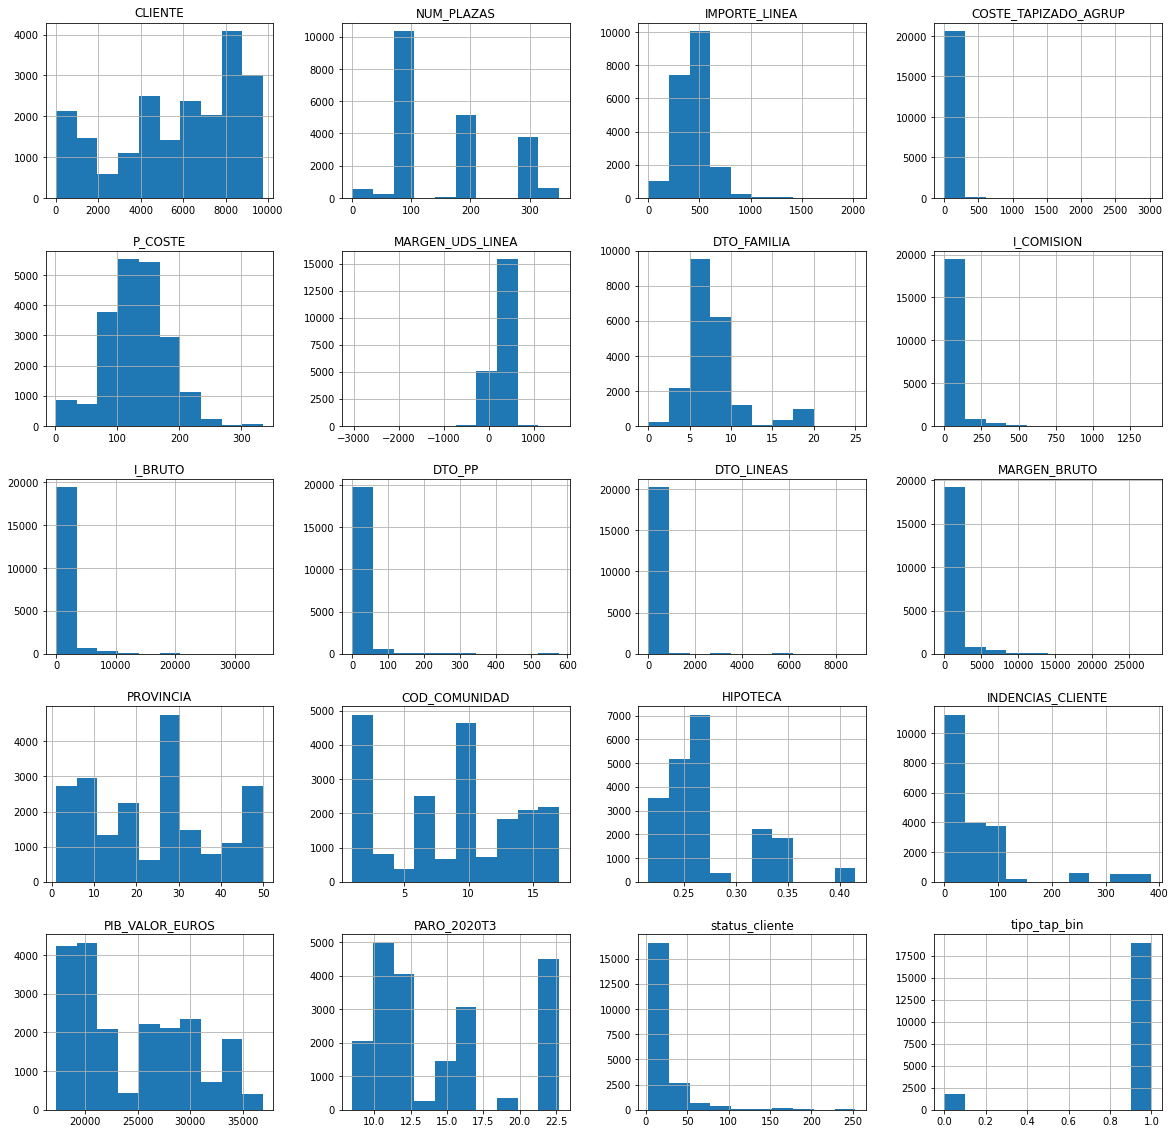

In [59]:
df_dedupped2.hist(figsize=(20, 20))
plt.show()

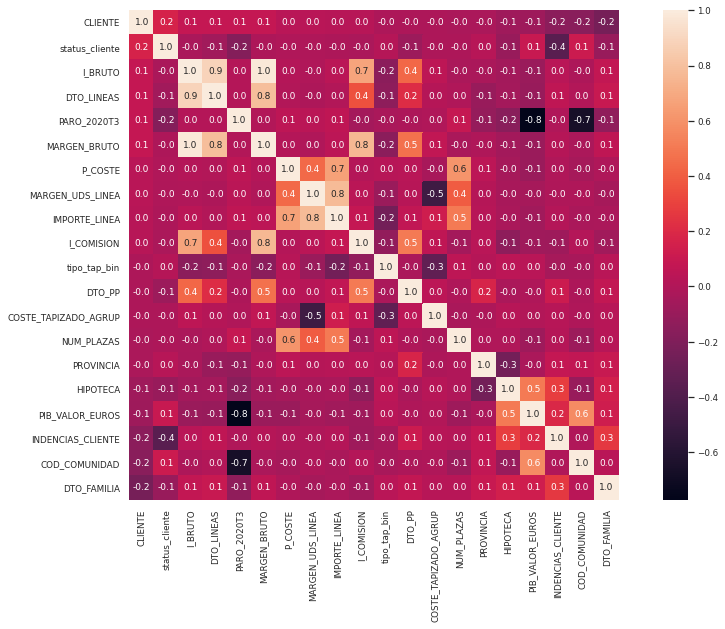

In [60]:
# Matriz de correlaciones con inserción del valor

k = 23  # Número de variables
corrmat = df_dedupped2.corr()
plt.figure(figsize=(16,9))
cols = corrmat.nlargest(k, 'CLIENTE')['CLIENTE'].index
cm = np.corrcoef(df_dedupped2[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: U

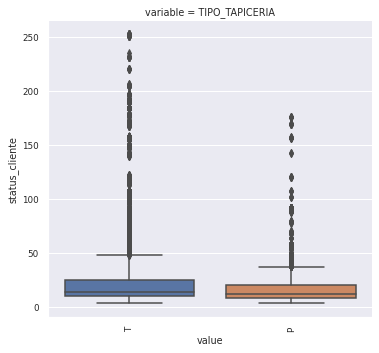

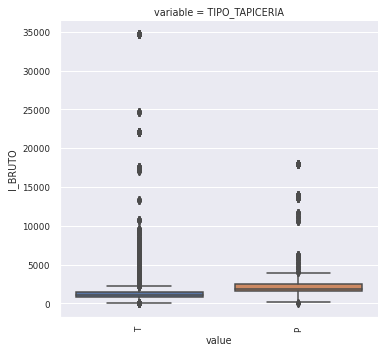

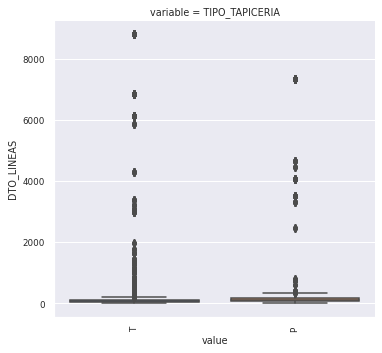

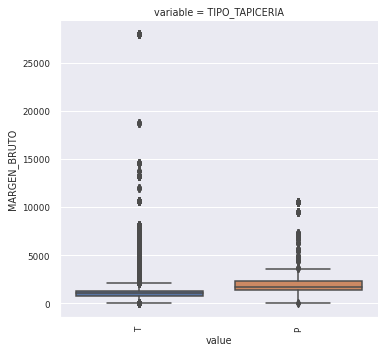

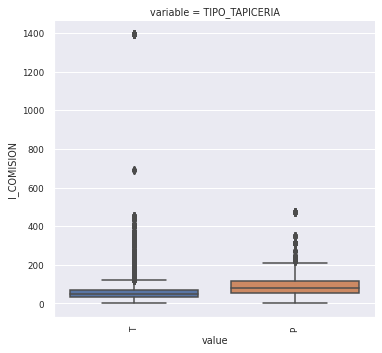

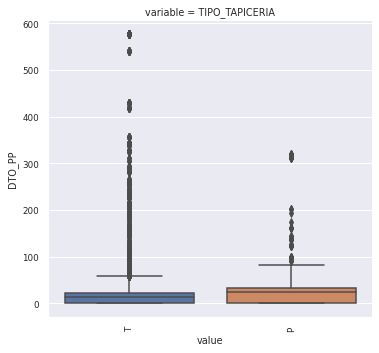

In [61]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

# cat = [f for f in train_cases_drop.columns if train_cases_drop.dtypes[f] == 'object']
cat = ['TIPO_TAPICERIA']

p = pd.melt(df_dedupped2, id_vars='status_cliente', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','status_cliente')
g

p = pd.melt(df_dedupped2, id_vars='I_BRUTO', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','I_BRUTO')
g

p = pd.melt(df_dedupped2, id_vars='DTO_LINEAS', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','DTO_LINEAS')
g

p = pd.melt(df_dedupped2, id_vars='MARGEN_BRUTO', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','MARGEN_BRUTO')
g

p = pd.melt(df_dedupped2, id_vars='I_COMISION', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','I_COMISION')
g

p = pd.melt(df_dedupped2, id_vars='DTO_PP', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','DTO_PP')
g

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


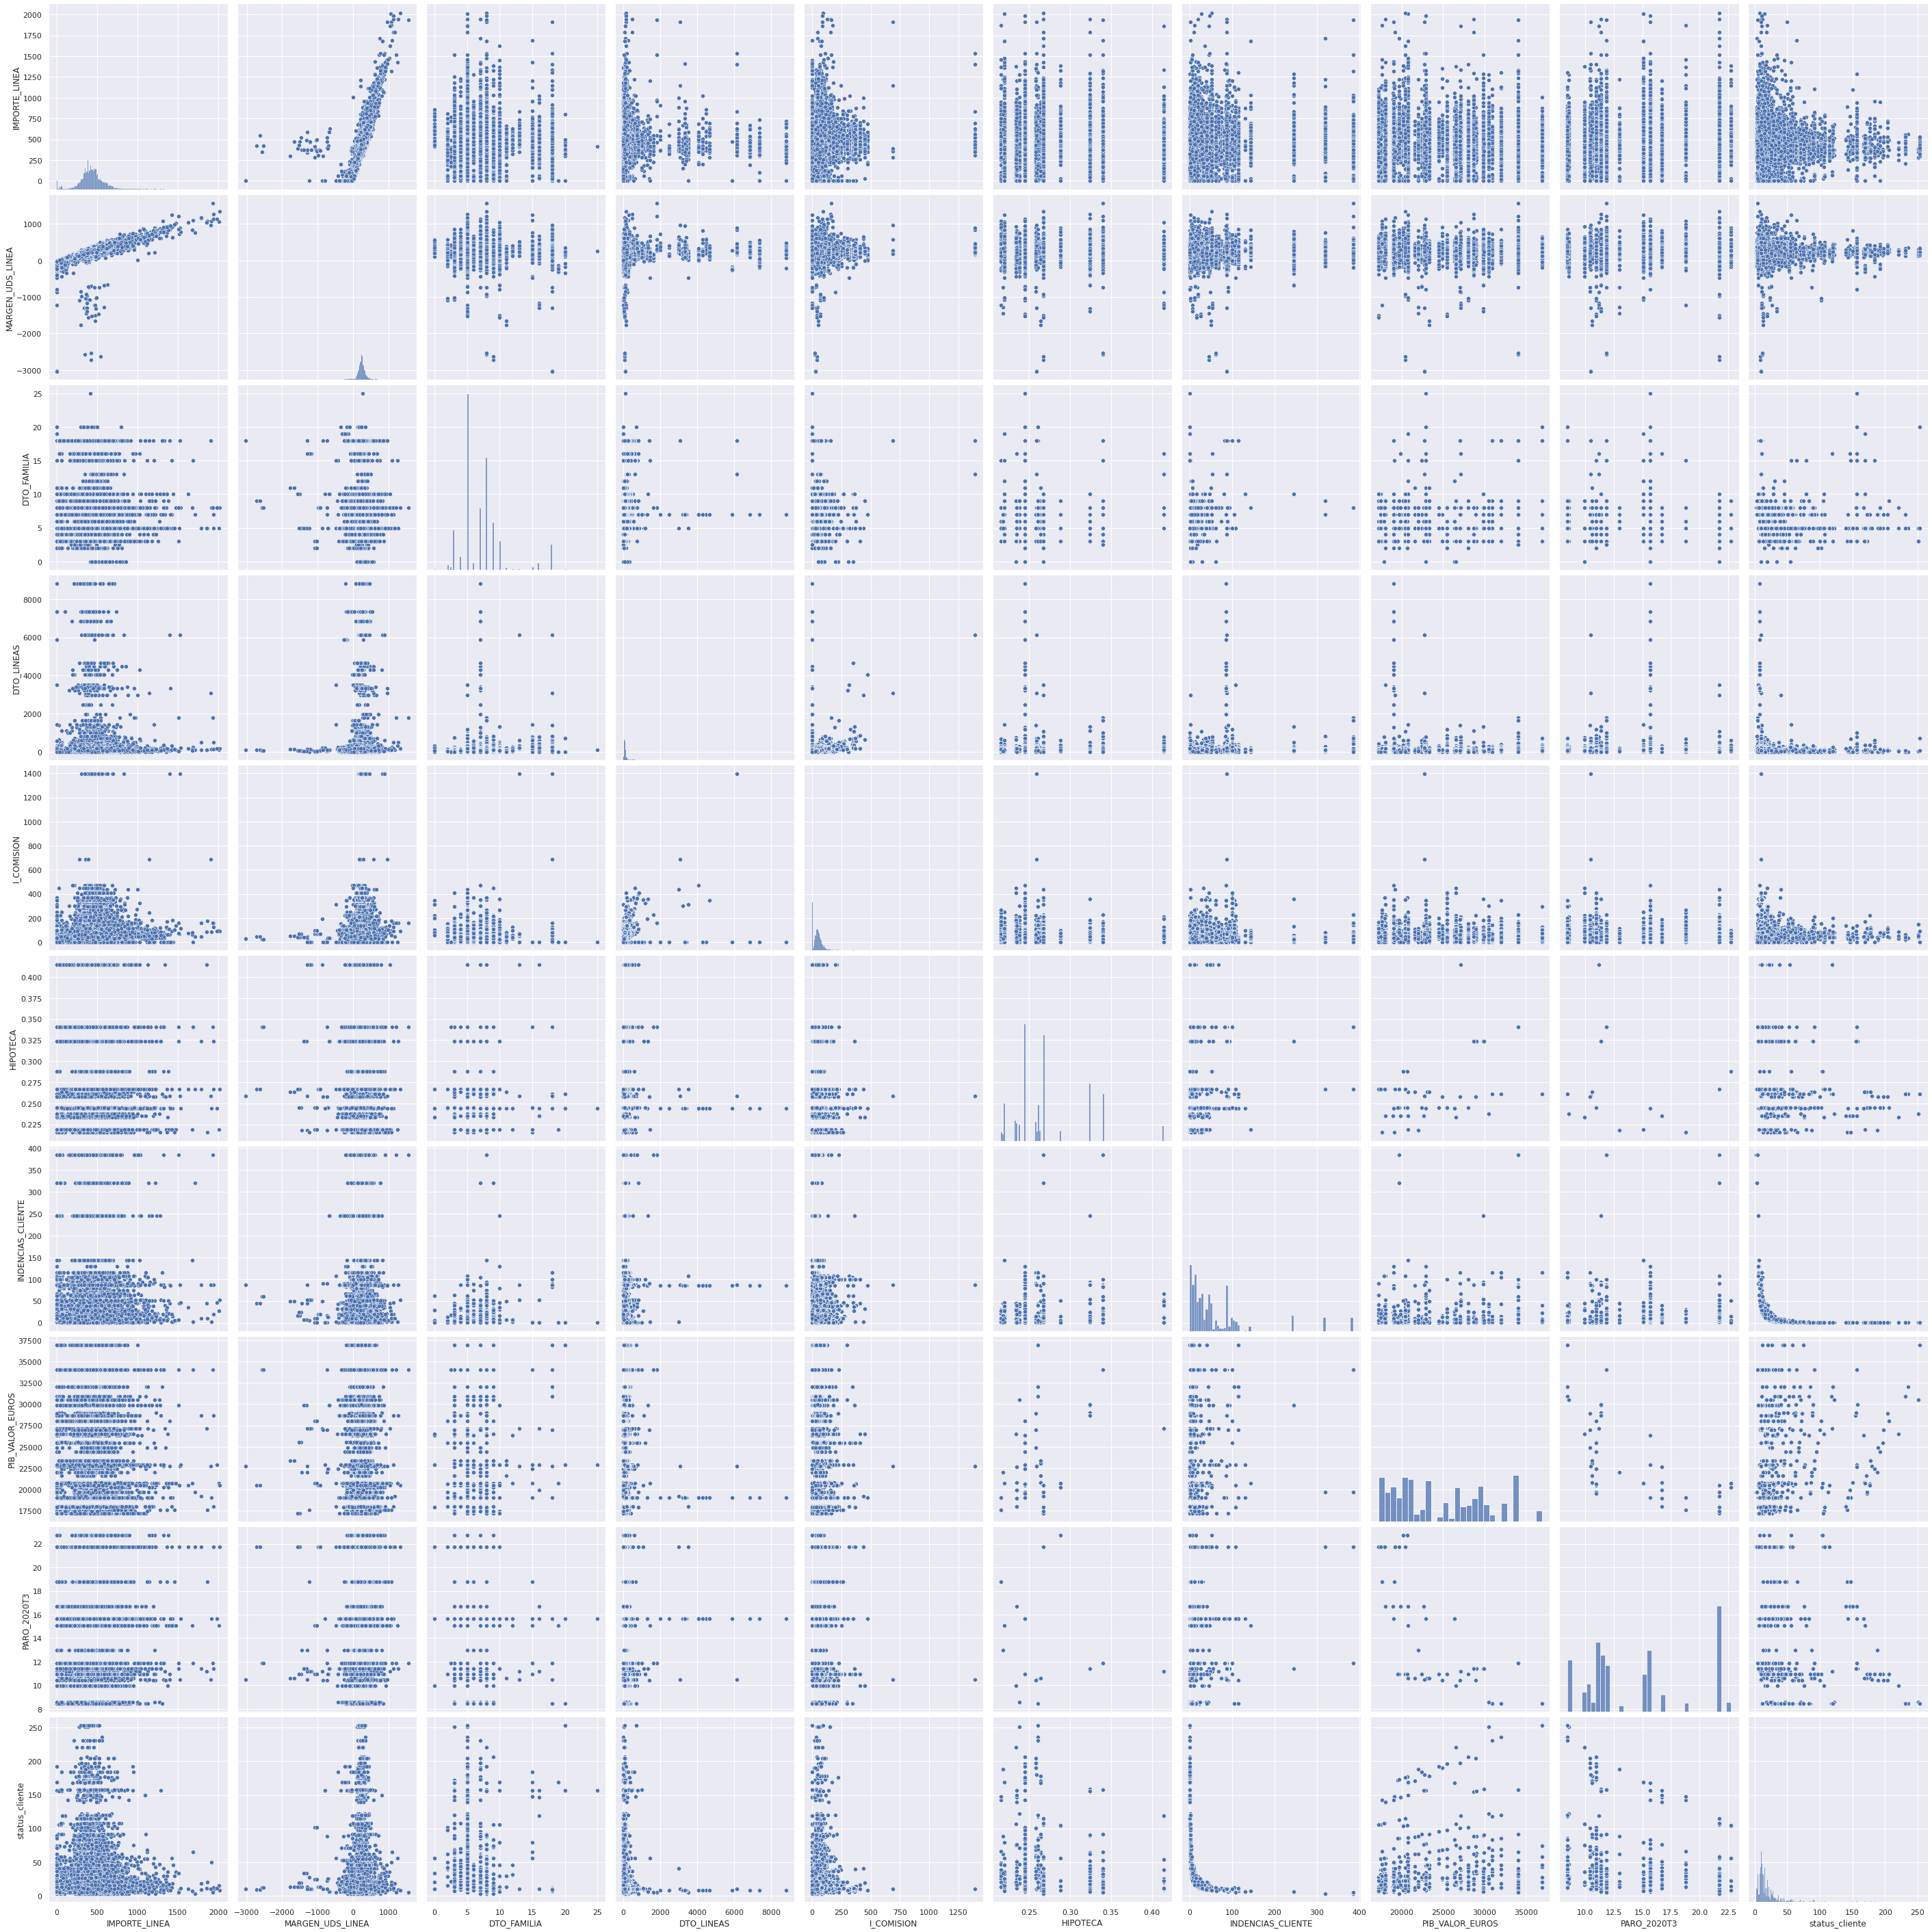

In [62]:
#scatterplot
sns.set()
cols = ['IMPORTE_LINEA', 'MARGEN_UDS_LINEA', 'DTO_FAMILIA','DTO_LINEAS','I_COMISION', 
        'HIPOTECA','INDENCIAS_CLIENTE','PIB_VALOR_EUROS','PARO_2020T3','status_cliente']
sns.pairplot(df_dedupped2[cols], size = 4)
plt.show();

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.rcParams['figure.figsize'] = [8, 8]
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
Z = linkage(df_fill_numeric,method='complete', metric='euclidean')
print(Z)
# print(df_fill_numeric)

[[ 3413.       5392.          0.          2.     ]
 [ 3412.       5391.          0.          2.     ]
 [ 3414.       5393.          0.          2.     ]
 ...
 [41448.      41450.      24489.04063   545.     ]
 [41453.      41454.      36416.95291 20691.     ]
 [40958.      41455.      47795.57159 20729.     ]]


In [64]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(df_fill_numeric)) # introduciomos los Z del clustering obtenido y la matriz de distancias de nuestros datos originales
print(c)

0.7366232265269097


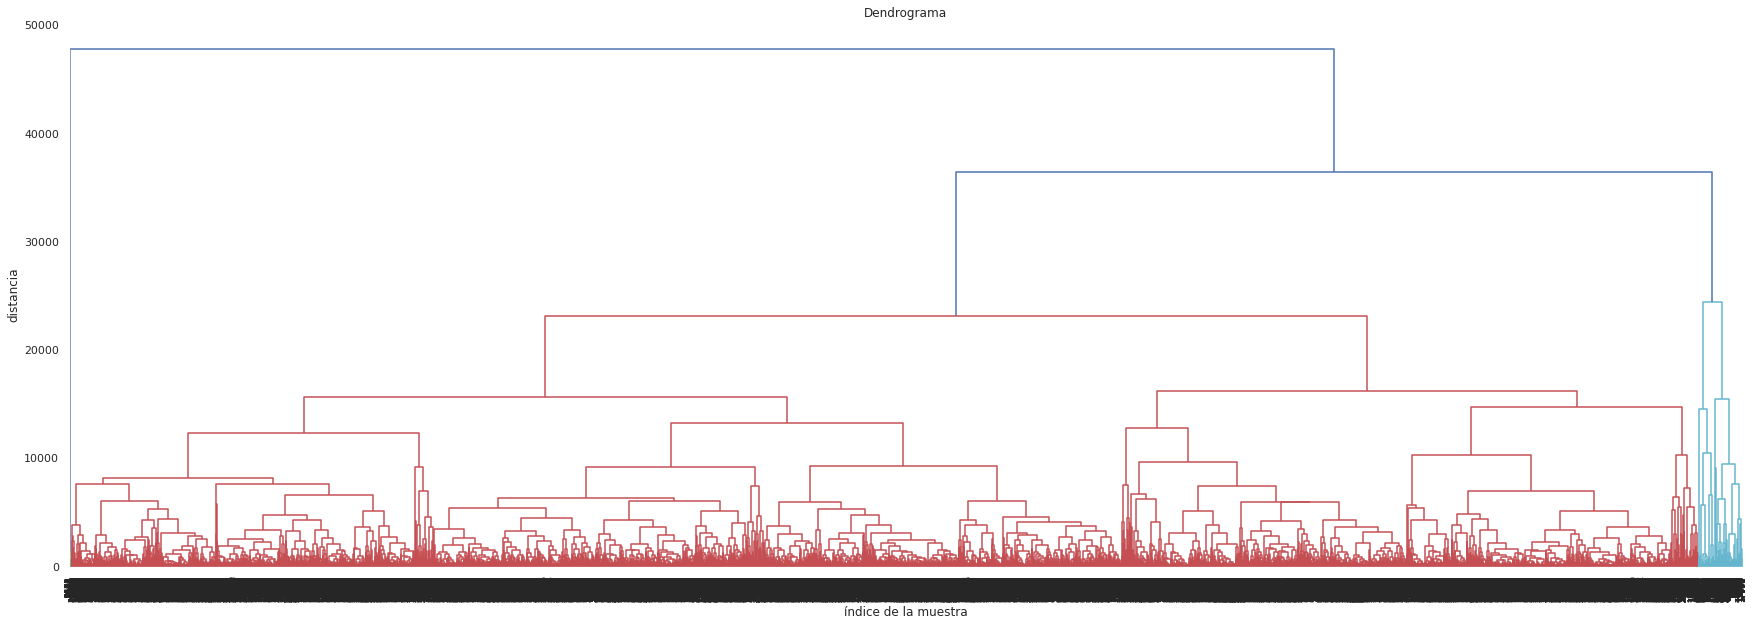

In [65]:
plt.figure(figsize=(30, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

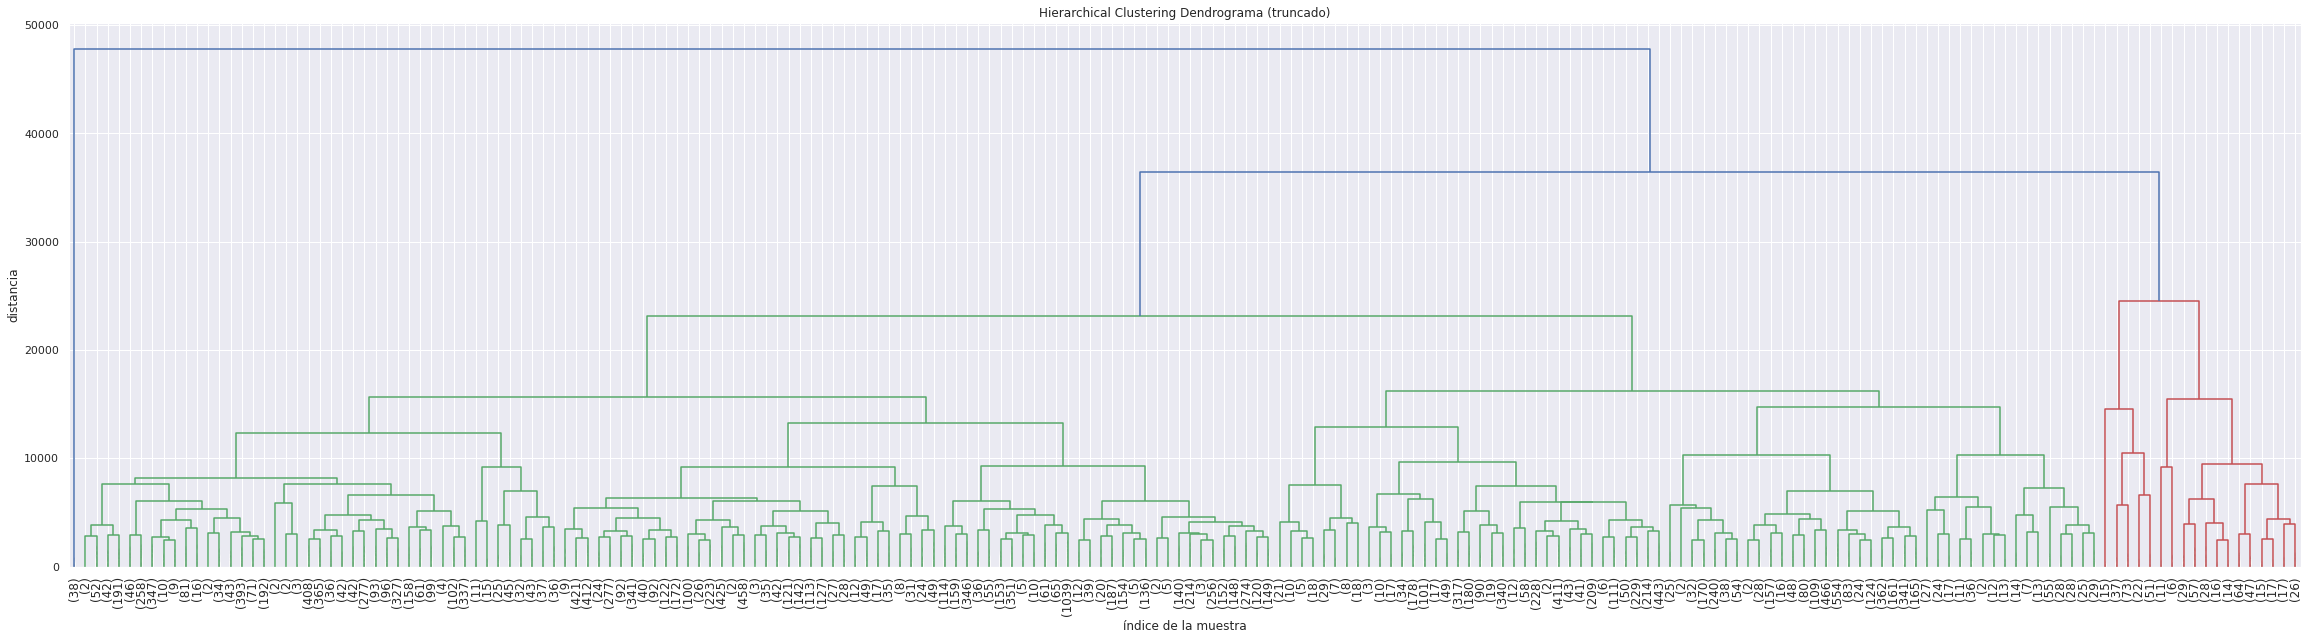

In [66]:
# quedarnos con las últimas p uniones
plt.figure(figsize=(40, 10))
plt.title('Hierarchical Clustering Dendrograma (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=200,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [67]:
from sklearn.preprocessing import Normalizer
Normalizados = Normalizer() #Standarizamos y centramos en cero --- la Normalización valoramos los datos entre 0-1 (rango mayor y menor)
X_Norm = Normalizados.fit_transform(df_fill_numeric) # para kmeans o dbscan necesitamos pesos parecidos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Standarizamos y centramos en cero --- la Normalización valoramos los datos entre 0-1 (rango mayor y menor)
X_scaled = scaler.fit_transform(df_fill_numeric) # para kmeans o dbscan necesitamos pesos parecidos


In [68]:
X_scaled

array([[-1.8448 ,  1.53445,  0.94649, ..., -0.63733, -0.47051,  0.30394],
       [-1.8448 , -0.72686,  0.20144, ..., -0.63733, -0.47051,  0.30394],
       [-1.8448 , -0.72686, -0.17109, ..., -0.63733, -0.47051,  0.30394],
       ...,
       [ 1.39143, -0.72686, -0.67613, ...,  0.51746,  4.16556,  0.30394],
       [ 1.39143,  0.40379,  0.41641, ...,  0.51746,  4.16556,  0.30394],
       [ 1.39143, -0.72686,  0.31887, ...,  0.51746,  4.16556,  0.30394]])

In [69]:
X_Norm

array([[0.01288, 0.01001, 0.01976, ..., 0.00038, 0.00032, 0.00003],
       [0.01288, 0.00334, 0.01571, ..., 0.00038, 0.00032, 0.00003],
       [0.01288, 0.00334, 0.01368, ..., 0.00038, 0.00032, 0.00003],
       ...,
       [0.47123, 0.00483, 0.01582, ..., 0.00081, 0.00675, 0.00005],
       [0.4711 , 0.00966, 0.02441, ..., 0.00081, 0.00675, 0.00005],
       [0.47113, 0.00483, 0.02364, ..., 0.00081, 0.00675, 0.00005]])

In [70]:
df_fill_numeric.head()

,CLIENTE,NUM_PLAZAS,IMPORTE_LINEA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente,tipo_tap_bin
0,386,300,592.02,90.13,154.01,347.88,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
1,386,100,470.58,90.13,127.43,253.02,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
2,386,100,409.86,90.13,110.43,209.30,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
3,4951,100,266.34,43.19,53.02,170.13,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1
4,4951,100,422.28,86.39,36.05,263.79,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1


In [71]:
df_fill_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20729 entries, 0 to 25257
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLIENTE               20729 non-null  int64  
 1   NUM_PLAZAS            20729 non-null  int64  
 2   IMPORTE_LINEA         20729 non-null  float64
 3   COSTE_TAPIZADO_AGRUP  20729 non-null  float64
 4   P_COSTE               20729 non-null  float64
 5   MARGEN_UDS_LINEA      20729 non-null  float64
 6   DTO_FAMILIA           20729 non-null  float64
 7   I_COMISION            20729 non-null  float64
 8   I_BRUTO               20729 non-null  float64
 9   DTO_PP                20729 non-null  float64
 10  DTO_LINEAS            20729 non-null  float64
 11  MARGEN_BRUTO          20729 non-null  float64
 12  PROVINCIA             20729 non-null  int64  
 13  COD_COMUNIDAD         20729 non-null  float64
 14  HIPOTECA              20729 non-null  float64
 15  INDENCIAS_CLIENTE  

Text(0, 0.5, 'Feature 1')

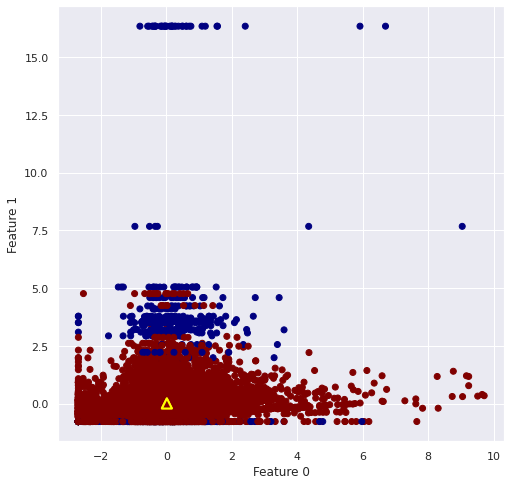

In [72]:
# cluster the data into 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random', n_init=1) # inicializa aleatoriamente por defecto o poner kmeans ++ (de 1-10)
y_pred = kmeans.fit_predict(X_Norm)

# plot the cluster assignments and cluster centers
plt.scatter(X_scaled[:, 2], X_scaled[:, 7], c=y_pred, cmap="jet")
plt.scatter(kmeans.cluster_centers_[:, 2],   
            kmeans.cluster_centers_[:, 7],
            marker='^', 
            c=[2, 7], 
            s=100, 
            linewidth=2,
            edgecolor='yellow',
            cmap="jet")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [73]:
# Se escribe a disco el dataset resultante

df_dedupped2.to_csv(r'datos_completos_dedupped.csv')
print(f"Cantidad de filas: {df_dedupped2.shape[0]}")
print(f"Cantidad de columnas: {df_dedupped2.shape[1]}")

Cantidad de filas: 20729
Cantidad de columnas: 24


In [74]:
df_MEC = df_dedupped2.copy()
num_MEC = df_MEC["MECANISMO_MODULO"].unique()
map_to_int = {name: n for n, name in enumerate(num_MEC)}
df_MEC["MECANISMO_MODULO"] = df_MEC["MECANISMO_MODULO"].replace(map_to_int)

df_MEC.MECANISMO_MODULO.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [75]:
df_CAT = df_MEC.copy()
num_CAT = df_CAT["CATEGORIA"].unique()
map_to_int = {name: n for n, name in enumerate(num_CAT)}
df_CAT["CATEGORIA"] = df_CAT["CATEGORIA"].replace(map_to_int)

df_CAT.CATEGORIA.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [76]:
df_MOD = df_CAT.copy()
targets = df_MOD["MODELO"].unique()
map_to_int = {name: n for n, name in enumerate(targets)}
df_MOD["MODELO"] = df_MOD["MODELO"].replace(map_to_int)
df_MOD.MODELO.unique()


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117])

In [81]:
df_MOD.head()

,CLIENTE,MODELO,NUM_PLAZAS,MECANISMO_MODULO,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente,tipo_tap_bin
0,386,0,300,0,592.02,0,T,90.13,154.01,347.88,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
1,386,0,100,1,470.58,0,T,90.13,127.43,253.02,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
2,386,0,100,0,409.86,0,T,90.13,110.43,209.30,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693,1
3,4951,1,100,2,266.34,0,T,43.19,53.02,170.13,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1
4,4951,1,100,2,422.28,0,T,86.39,36.05,263.79,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733,1


## Selección de caracteristicas

In [88]:
# Se escribe a disco el dataset resultante

df_MOD.to_csv(r'datos_completos_dedupped.csv')
#print(f"Cantidad de filas: {df_dedupped2.shape[0]}")
#print(f"Cantidad de columnas: {df_dedupped2.shape[1]}")

In [90]:
# generate output
output = pd.DataFrame({ 'CLIENTE': df_MOD['CLIENTE'], 'MODELO': df_MOD['MODELO'], 'NUM_PLAZAS': df_MOD['NUM_PLAZAS'],
                        'MECANISMO_MODULO': df_MOD['MECANISMO_MODULO'], 'IMPORTE_LINEA':df_MOD['IMPORTE_LINEA'], 'CATEGORIA':df_MOD['CATEGORIA'],
                        'TIPO_TAPICERIA':df_MOD['TIPO_TAPICERIA'], 'COSTE_TAPIZADO_AGRUP':df_MOD['COSTE_TAPIZADO_AGRUP'], 'P_COSTE':df_MOD['P_COSTE'], 
                        'MARGEN_UDS_LINEA':df_MOD['MARGEN_UDS_LINEA'], 'DTO_FAMILIA':df_MOD['DTO_FAMILIA'], 'I_COMISION':df_MOD['I_COMISION'],
                        'I_BRUTO':df_MOD['I_BRUTO'], 'DTO_PP':df_MOD['DTO_PP'], 'DTO_LINEAS':df_MOD['DTO_LINEAS'], 'MARGEN_BRUTO':df_MOD['MARGEN_BRUTO'],
                        'PROVINCIA':df_MOD['PROVINCIA'], 'COD_COMUNIDAD':df_MOD['COD_COMUNIDAD'], 'HIPOTECA':df_MOD['HIPOTECA'], 'INDENCIAS_CLIENTE':df_MOD['INDENCIAS_CLIENTE'],
                        'PIB_VALOR_EUROS':df_MOD['PIB_VALOR_EUROS'], 'PARO_2020T3':df_MOD['PARO_2020T3'], 'status_cliente':df_MOD['status_cliente']
                        })


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,CLIENTE,MODELO,NUM_PLAZAS,MECANISMO_MODULO,IMPORTE_LINEA,CATEGORIA,TIPO_TAPICERIA,COSTE_TAPIZADO_AGRUP,P_COSTE,MARGEN_UDS_LINEA,DTO_FAMILIA,I_COMISION,I_BRUTO,DTO_PP,DTO_LINEAS,MARGEN_BRUTO,PROVINCIA,COD_COMUNIDAD,HIPOTECA,INDENCIAS_CLIENTE,PIB_VALOR_EUROS,PARO_2020T3,status_cliente
0,386,0,300,0,592.02,0,T,90.13,154.01,347.88,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
1,386,0,100,1,470.58,0,T,90.13,127.43,253.02,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
2,386,0,100,0,409.86,0,T,90.13,110.43,209.30,8.0,67.73,1472.46,0.00,117.80,1354.66,8,9.0,0.3240,89.0,29885.0,11.40,9.534693
3,4951,1,100,2,266.34,0,T,43.19,53.02,170.13,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733
4,4951,1,100,2,422.28,0,T,86.39,36.05,263.79,16.0,0.00,1305.48,21.93,208.86,1074.70,7,4.0,0.4149,53.0,27134.0,11.18,10.505733


In [91]:
# 0.1 load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving result (1).csv to result (1).csv
User uploaded file "result (1).csv" with length 2688414 bytes


In [93]:
# 0.2 load data in DataFrame
# import pandas as pd
# import io

from numpy import corrcoef, transpose, arange
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col='TIPO_TAPICERIA')
df_feat = transpose(df)
df_feat

TIPO_TAPICERIA,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,P,T,T,T,T
CLIENTE,386.000000,386.000000,386.000000,4951.000000,4951.000000,4951.000000,6041.000000,6041.000000,6305.000000,6305.000000,6464.000000,6464.000000,6790.000000,6790.000000,7254.000000,8031.000000,8031.000000,8031.000000,8077.000000,8077.000000,8758.000000,47.000000,47.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,813.000000,813.000000,936.000000,936.000000,936.000000,936.000000,1114.000000,1114.000000,...,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,6220.000000,6289.000000,6289.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6632.000000,7040.000000,7040.000000,7040.000000,7040.000000,7761.000000,7761.000000,8169.000000,8169.000000,8169.000000,8662.000000,8662.000000,9150.000000,9314.000000,9314.000000,9314.000000,9314.000000,9499.000000,9519.000000,9758.000000,9758.000000,9758.000000,9758.000000
MODELO,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,6.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,0.000000,0.000000,8.000000,8.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,5.000000,5.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,...,0.000000,0.000000,0.000000,44.000000,44.000000,44.000000,3.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,23.000000,23.000000,16.000000,23.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,65.000000,65.000000,65.000000,29.000000,29.000000,37.000000,12.000000,12.000000,65.000000,20.000000,104.000000,1.000000,44.000000,44.000000,44.000000,80.000000
NUM_PLAZAS,300.000000,100.000000,100.000000,100.000000,100.000000,75.000000,300.000000,200.000000,75.000000,100.000000,100.000000,100.000000,100.000000,200.000000,300.000000,200.000000,100.000000,100.000000,100.000000,100.000000,300.000000,300.000000,100.000000,200.000000,200.000000,100.000000,100.000000,75.000000,100.000000,100.000000,100.000000,200.000000,300.000000,200.000000,100.000000,100.000000,75.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,200.000000,100.000000,100.000000,200.000000,100.000000,100.000000,100.000000,100.000000,100.000000,75.000000,200.000000,50.000000,300.000000,200.000000,0.000000,300.000000,100.000000,100.000000,75.000000,100.000000,300.000000,300.000000,200.000000,300.000000,300.000000,300.000000,75.000000,200.000000,200.000000,300.000000,300.000000,200.000000,300.000000,200.000000,100.000000,100.000000,200.000000,100.000000
MECANISMO_MODULO,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,4.000000,0.000000,4.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000
IMPORTE_LINEA,592.020000,470.580000,409.860000,266.340000,422.280000,350.520000,552.000000,436.080000,400.200000,274.620000,376.740000,295.320000,442.980000,552.000000,476.100000,290.000000,256.000000,310.000000,362.940000,442.980000,663.780000,625.140000,396.060000,451.260000,380.880000,389.160000,304.980000,361.560000,283.600000,470.580000,373.980000,452.640000,619.620000,471.960000,418.140000,333.960000,420.900000,342.240000,258.060000,328.440000,...,483.000000,383.600000,471.80000

Una vez que contamos con el DataFrame de Pandas podríamos analizar qué características necesitamos y cuales deberíamos excluir.

In [94]:
names =  df_feat.index
names

Index(['CLIENTE', 'MODELO', 'NUM_PLAZAS', 'MECANISMO_MODULO', 'IMPORTE_LINEA',
       'CATEGORIA', 'COSTE_TAPIZADO_AGRUP', 'P_COSTE', 'MARGEN_UDS_LINEA',
       'DTO_FAMILIA', 'I_COMISION', 'I_BRUTO', 'DTO_PP', 'DTO_LINEAS',
       'MARGEN_BRUTO', 'PROVINCIA', 'COD_COMUNIDAD', 'HIPOTECA',
       'INDENCIAS_CLIENTE', 'PIB_VALOR_EUROS', 'PARO_2020T3',
       'status_cliente'],
      dtype='object')

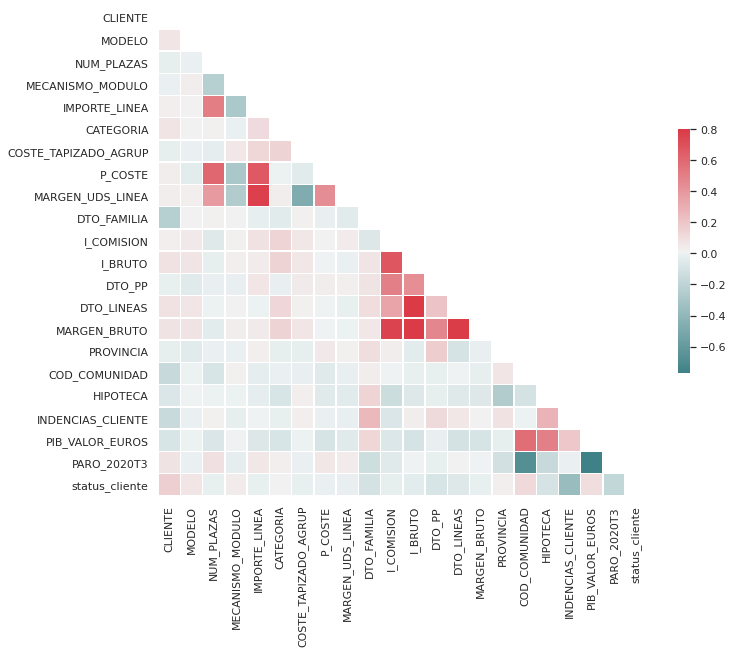

In [95]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_feat)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Las variables están correlacionadas entre ellas, pero no demasiado (no llega a 1) esto puede hacer que las sigamos teniendo en cuenta aunque hay que ser consciente que algunas de ellas pueden ser muy parecidas.

Variance Ratio:  [0.96539 0.0193 ]


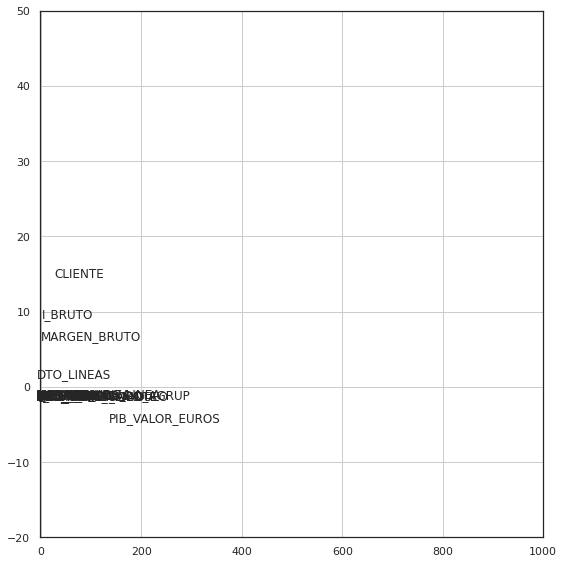

In [101]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-2, 1000)
plt.ylim(-20, 50)
ax.grid(True)
fig.tight_layout()
plt.show()

El ratio de variabilidad por eje es bueno, con el eje X se representa casi el 97% de la variabilidad del conjunto de datos. 

Una vez que hemos verificado que el resultado es fiable podemos ver que muchas de las variables son muy parecidas entre ellas, y son algunas de ellas como 
*PIB_VALOR_EUROS*, *DTO_LINEAS*, *MARGEN_BRUTO*, *I_BRUTO* Y *CLIENTE* los que son distintos de las demás y podrían ser las seleccionadas para realizar un clustering posterior.

En este caso no nos interesa observar qué combinación lineal da forma a cada componente ya que no nos interesa seleccionar aquellos estados que son más relevantes.